# Importing Library and Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
ems=pd.read_csv('co2_emissions.csv')
ems.head(15)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS,Z,10.6,7.5,9.2,31,212


# EDA

In [4]:
ems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            7385 non-null   object 
 1   model                           7385 non-null   object 
 2   vehicle_class                   7385 non-null   object 
 3   engine_size                     7385 non-null   float64
 4   cylinders                       7385 non-null   int64  
 5   transmission                    7385 non-null   object 
 6   fuel_type                       7385 non-null   object 
 7   fuel_consumption_city           7385 non-null   float64
 8   fuel_consumption_hwy            7385 non-null   float64
 9   fuel_consumption_comb(l/100km)  7385 non-null   float64
 10  fuel_consumption_comb(mpg)      7385 non-null   int64  
 11  co2_emissions                   7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)

In [5]:
ems.isnull().sum()

make                              0
model                             0
vehicle_class                     0
engine_size                       0
cylinders                         0
transmission                      0
fuel_type                         0
fuel_consumption_city             0
fuel_consumption_hwy              0
fuel_consumption_comb(l/100km)    0
fuel_consumption_comb(mpg)        0
co2_emissions                     0
dtype: int64

In [6]:
ems[ems.duplicated()]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
1075,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
1076,ACURA,RLX,MID-SIZE,3.5,6,AS,Z,11.9,7.7,10.0,28,230
1081,ALFA ROMEO,4C,TWO-SEATER,1.8,4,AM,Z,9.7,6.9,8.4,34,193
1082,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A,Z,18.0,12.6,15.6,18,359
1084,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,AM,Z,17.4,11.3,14.7,19,338
...,...,...,...,...,...,...,...,...,...,...,...,...
7356,TOYOTA,Tundra,PICKUP TRUCK - STANDARD,5.7,8,AS,X,17.7,13.6,15.9,18,371
7365,VOLKSWAGEN,Golf GTI,COMPACT,2.0,4,M,X,9.8,7.3,8.7,32,203
7366,VOLKSWAGEN,Jetta,COMPACT,1.4,4,AS,X,7.8,5.9,7.0,40,162
7367,VOLKSWAGEN,Jetta,COMPACT,1.4,4,M,X,7.9,5.9,7.0,40,163


In [7]:
ems.drop_duplicates(inplace=True)

In [8]:
ems.nunique()

make                                42
model                             2053
vehicle_class                       16
engine_size                         51
cylinders                            8
transmission                         5
fuel_type                            5
fuel_consumption_city              211
fuel_consumption_hwy               143
fuel_consumption_comb(l/100km)     181
fuel_consumption_comb(mpg)          54
co2_emissions                      331
dtype: int64

In [9]:
print(ems.vehicle_class.value_counts())

vehicle_class
SUV - SMALL                 1004
MID-SIZE                     981
COMPACT                      902
SUV - STANDARD               613
SUBCOMPACT                   532
FULL-SIZE                    508
PICKUP TRUCK - STANDARD      474
TWO-SEATER                   381
MINICOMPACT                  274
STATION WAGON - SMALL        212
PICKUP TRUCK - SMALL         133
VAN - PASSENGER               66
SPECIAL PURPOSE VEHICLE       65
MINIVAN                       61
STATION WAGON - MID-SIZE      45
VAN - CARGO                   22
Name: count, dtype: int64


In [10]:
ems.cylinders.value_counts()

cylinders
4     2741
6     2040
8     1201
12     135
3       88
10      40
5       26
16       2
Name: count, dtype: int64

In [11]:
ems.transmission.value_counts()

transmission
AS    2720
A     1536
M     1019
AM     540
AV     458
Name: count, dtype: int64

In [12]:
ems.fuel_type.value_counts()

fuel_type
X    3030
Z    2765
E     330
D     147
N       1
Name: count, dtype: int64

In [13]:
ems[ems['fuel_type']=='N']

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
2439,CHEVROLET,IMPALA DUAL FUEL,MID-SIZE,3.6,6,AS,N,15.2,9.5,12.7,22,213


In [14]:
def unique(list1):
    unique_list = pd.Series(list1).drop_duplicates().tolist()
    for x in unique_list:
        print(x)
unique_cars=unique(ems['make'])
unique_cars

ACURA
ALFA ROMEO
ASTON MARTIN
AUDI
BENTLEY
BMW
BUICK
CADILLAC
CHEVROLET
CHRYSLER
DODGE
FIAT
FORD
GMC
HONDA
HYUNDAI
INFINITI
JAGUAR
JEEP
KIA
LAMBORGHINI
LAND ROVER
LEXUS
LINCOLN
MASERATI
MAZDA
MERCEDES-BENZ
MINI
MITSUBISHI
NISSAN
PORSCHE
RAM
ROLLS-ROYCE
SCION
SMART
SRT
SUBARU
TOYOTA
VOLKSWAGEN
VOLVO
GENESIS
BUGATTI


### CARS

ACURA

In [15]:
ems_acura=ems[ems['make']=='ACURA']
ems_acura.shape

(51, 12)

In [16]:
ems_acura.nunique()

make                               1
model                             22
vehicle_class                      4
engine_size                        6
cylinders                          2
transmission                       4
fuel_type                          1
fuel_consumption_city             30
fuel_consumption_hwy              22
fuel_consumption_comb(l/100km)    28
fuel_consumption_comb(mpg)        15
co2_emissions                     38
dtype: int64

In [17]:
print(ems_acura['engine_size'].mean())
print(ems_acura['cylinders'].mean())
print(ems_acura['fuel_consumption_city'].mean())
print(ems_acura['fuel_consumption_hwy'].mean())
print(ems_acura['fuel_consumption_comb(l/100km)'].mean())
print(ems_acura['fuel_consumption_comb(mpg)'].mean())
print(ems_acura['co2_emissions'].mean())

3.003921568627451
5.254901960784314
10.754901960784311
8.037254901960784
9.535294117647059
30.15686274509804
221.66666666666666


<BarContainer object of 51 artists>

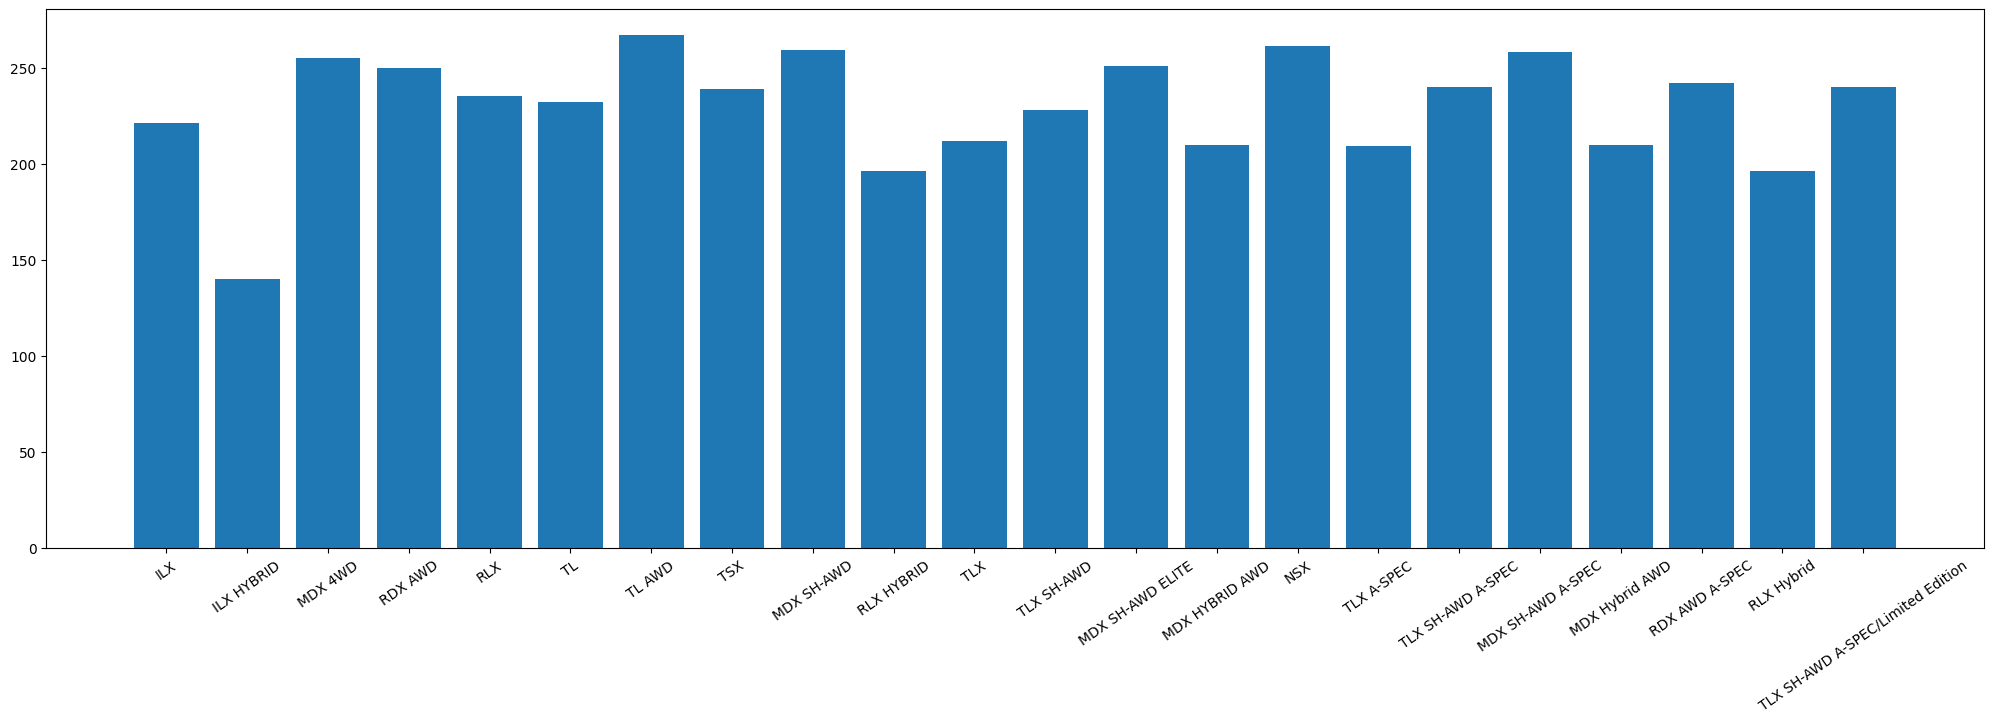

In [18]:
plt.subplots(figsize=(25,7))
plt.xticks(rotation=35)
plt.bar(ems_acura['model'],ems_acura['co2_emissions'])

<BarContainer object of 51 artists>

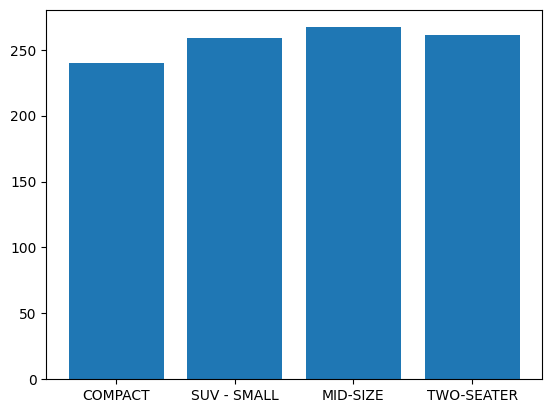

In [19]:
plt.bar(ems_acura['vehicle_class'],ems_acura['co2_emissions'])

[2.  2.4 1.5 3.5 3.7 3. ]


<BarContainer object of 51 artists>

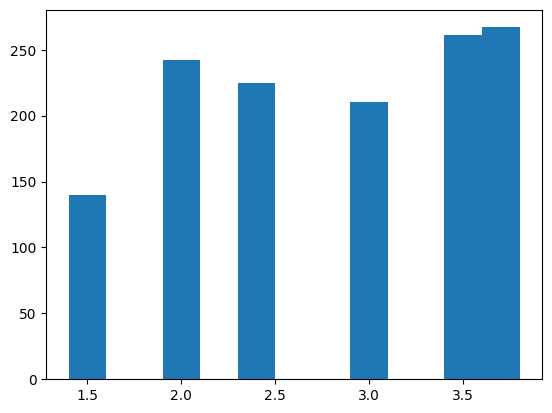

In [20]:
print(ems_acura['engine_size'].unique())
plt.bar(ems_acura['engine_size'],ems_acura['co2_emissions'],width=0.2)

[4 6]


<BarContainer object of 51 artists>

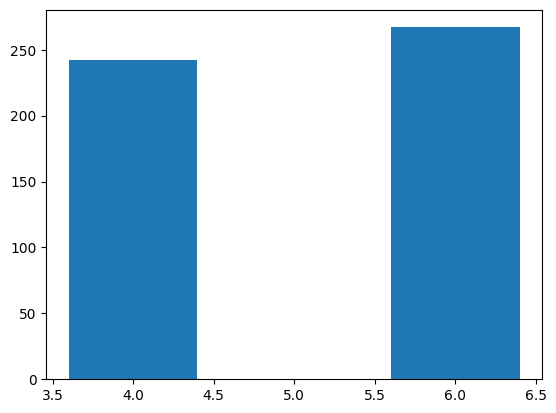

In [21]:
print(ems_acura['cylinders'].unique())
plt.bar(ems_acura['cylinders'],ems_acura['co2_emissions'])

['AS' 'M' 'AV' 'AM']


<BarContainer object of 51 artists>

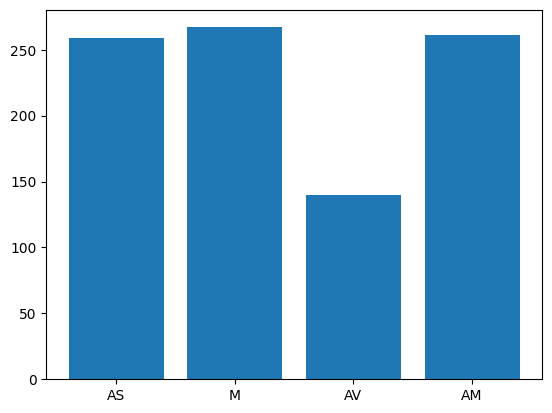

In [22]:
print(ems_acura['transmission'].unique())
plt.bar(ems_acura['transmission'],ems_acura['co2_emissions'])

['Z']


<BarContainer object of 51 artists>

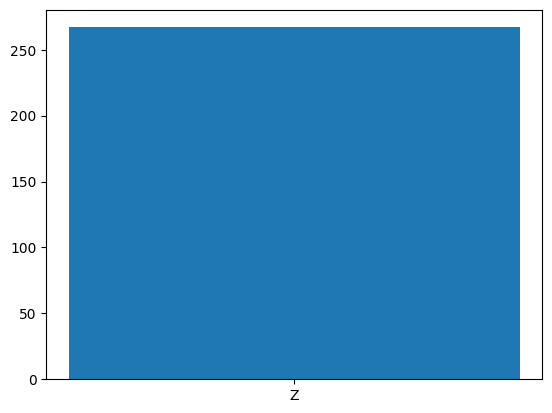

In [23]:
print(ems_acura['fuel_type'].unique())
plt.bar(ems_acura['fuel_type'],ems_acura['co2_emissions'])

ALFA ROMEO

In [24]:
ems_alfaromeo=ems[ems['make']=='ALFA ROMEO']
ems_alfaromeo.shape

(19, 12)

ASTON MARTIN

In [25]:
ems_astonmartin=ems[ems['make']=='ASTON MARTIN']
ems_astonmartin.shape

(39, 12)

AUDI

In [26]:
ems_audi=ems[ems['make']=='AUDI']
ems_audi.shape

(263, 12)

BENTLY

In [27]:
ems_bentley=ems[ems['make']=='BENTLEY']
ems_bentley.shape

(35, 12)

BMW

In [28]:
ems_bmw=ems[ems['make']=='BMW']
ems_bmw.shape

(501, 12)

BUICK

In [29]:
ems_buick=ems[ems['make']=='BUICK']
ems_buick.shape

(92, 12)

CADILLAC

In [30]:
ems_cadillac=ems[ems['make']=='CADILLAC']
ems_cadillac.shape

(141, 12)

CHEVROLET

In [31]:
ems_chevrolet=ems[ems['make']=='CHEVROLET']
ems_chevrolet.shape

(515, 12)

CHRYSLER

In [32]:
ems_chrysler=ems[ems['make']=='CHRYSLER']
ems_chrysler.shape

(64, 12)

DODGE

In [33]:
ems_dodge=ems[ems['make']=='DODGE']
ems_dodge.shape

(180, 12)

FIAT

In [34]:
ems_fiat=ems[ems['make']=='FIAT']
ems_fiat.shape

(56, 12)

FORD

In [35]:
ems_ford=ems[ems['make']=='FORD']
ems_ford.shape

(575, 12)

GMC

In [36]:
ems_gmc=ems[ems['make']=='GMC']
ems_gmc.shape

(289, 12)

HONDA

In [37]:
ems_honda=ems[ems['make']=='HONDA']
ems_honda.shape

(159, 12)

HYUNDAI

In [38]:
ems_hyundai=ems[ems['make']=='HYUNDAI']
ems_hyundai.shape

(184, 12)

INFINITI

In [39]:
ems_infiniti=ems[ems['make']=='INFINITI']
ems_infiniti.shape

(87, 12)

JAGUAR

In [40]:
ems_jaguar=ems[ems['make']=='JAGUAR']
ems_jaguar.shape

(118, 12)

JEEP

In [41]:
ems_jeep=ems[ems['make']=='JEEP']
ems_jeep.shape

(200, 12)

KIA

In [42]:
ems_kia=ems[ems['make']=='KIA']
ems_kia.shape

(192, 12)

LAMBORGHINI

In [43]:
ems_lamb=ems[ems['make']=='LAMBORGHINI']
ems_lamb.shape

(37, 12)

LAND ROVER

In [44]:
ems_landrover=ems[ems['make']=='LAND ROVER']
ems_landrover.shape

(76, 12)

LEXUS

In [45]:
ems_lexus=ems[ems['make']=='LEXUS']
ems_lexus.shape

(129, 12)

LINCOLN

In [46]:
ems_lincoln=ems[ems['make']=='LINCOLN']
ems_lincoln.shape

(81, 12)

MASERATI

In [47]:
ems_maserati=ems[ems['make']=='MASERATI']
ems_maserati.shape

(52, 12)

MAZDA

In [48]:
ems_mazda=ems[ems['make']=='MAZDA']
ems_mazda.shape

(127, 12)

MERCEDES-BENZ

In [49]:
ems_benz=ems[ems['make']=='MERCEDES-BENZ']
ems_benz.shape

(365, 12)

MINI

In [50]:
ems_mini=ems[ems['make']=='MINI']
ems_mini.shape

(200, 12)

MITSUBISHI

In [51]:
ems_mitsubishi=ems[ems['make']=='MITSUBISHI']
ems_mitsubishi.shape

(73, 12)

NISSAN

In [52]:
ems_nissan=ems[ems['make']=='NISSAN']
ems_nissan.shape

(213, 12)

PORSCHE

In [53]:
ems_porsche=ems[ems['make']=='PORSCHE']
ems_porsche.shape

(296, 12)

RAM

In [54]:
ems_ram=ems[ems['make']=='RAM']
ems_ram.shape

(72, 12)

ROLLS-ROYCE

In [55]:
ems_rollsroyce=ems[ems['make']=='ROLLS-ROYCE']
ems_rollsroyce.shape

(48, 12)

SCION

In [56]:
ems_scion=ems[ems['make']=='SCION']
ems_scion.shape

(21, 12)

SMART

In [57]:
ems_smart=ems[ems['make']=='SMART']
ems_smart.shape

(7, 12)

SRT

In [58]:
ems_srt=ems[ems['make']=='SRT']
ems_srt.shape

(2, 12)

SUBARU

In [59]:
ems_subaru=ems[ems['make']=='SUBARU']
ems_subaru.shape

(119, 12)

TOYOTA

In [60]:
ems_toyota=ems[ems['make']=='TOYOTA']
ems_toyota.shape

(274, 12)

VOLKSWAGEN

In [61]:
ems_volkswagen=ems[ems['make']=='VOLKSWAGEN']
ems_volkswagen.shape

(187, 12)

VOLVO

In [62]:
ems_volvo=ems[ems['make']=='VOLVO']
ems_volvo.shape

(118, 12)

GENESIS

In [63]:
ems_genesis=ems[ems['make']=='GENESIS']
ems_genesis.shape

(14, 12)

BUGATTI

In [64]:
ems_bugatti=ems[ems['make']=='BUGATTI']
ems_bugatti.shape

(2, 12)

### PLOTS

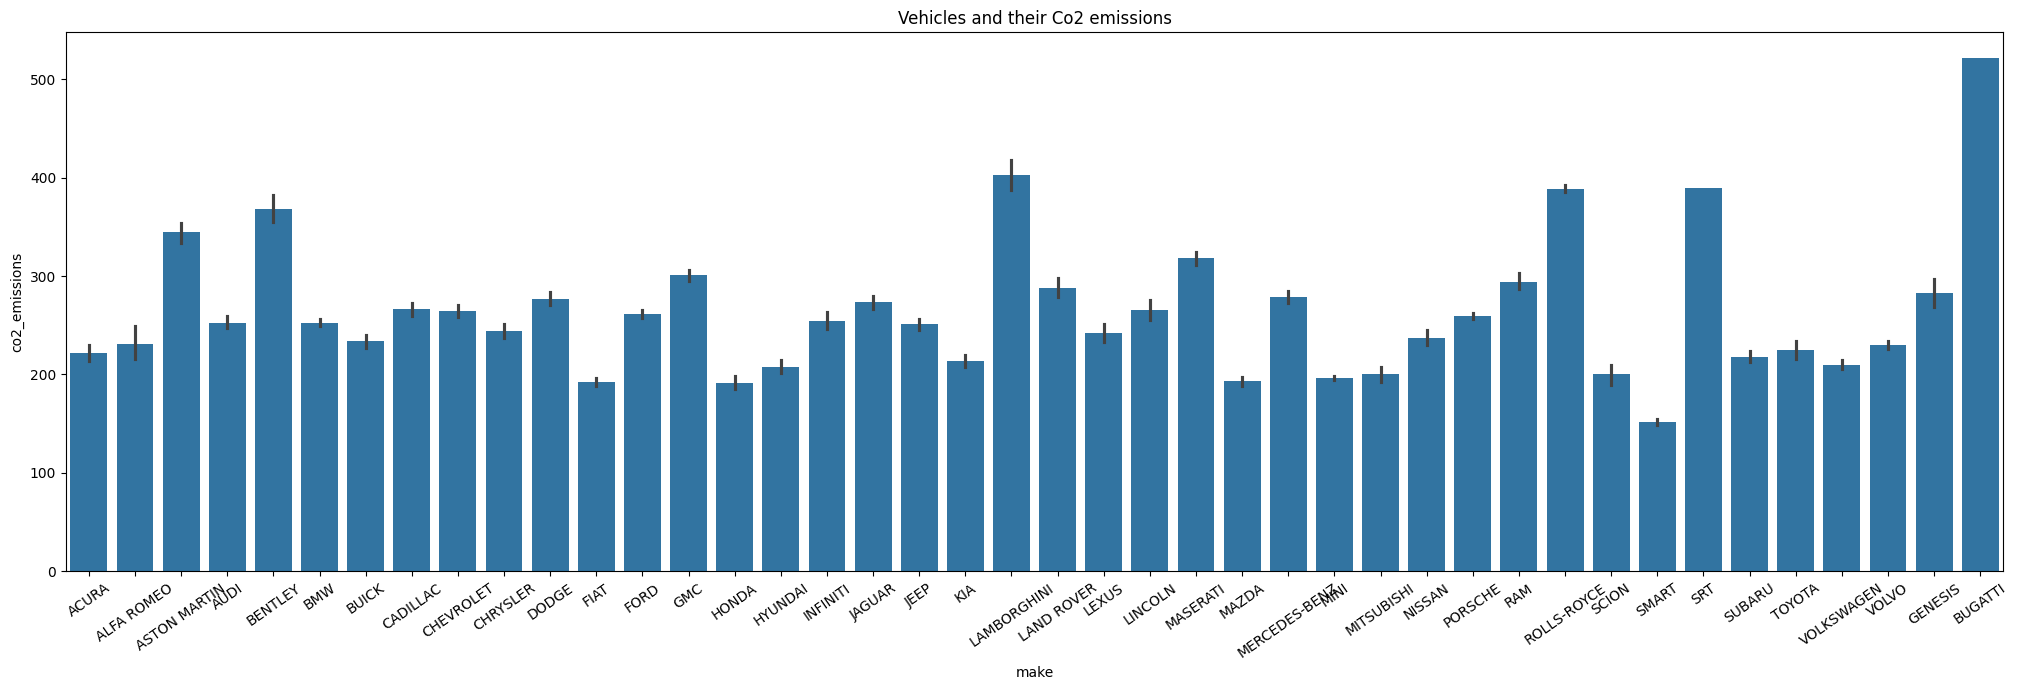

In [65]:
f, ax = plt.subplots(figsize=(25,7))
ax = sns.barplot(data=ems,x='make',y='co2_emissions')
plt.title('Vehicles and their Co2 emissions')
plt.xticks(rotation=35)
plt.show()

BUGATTI has the highest CO2 Emissions

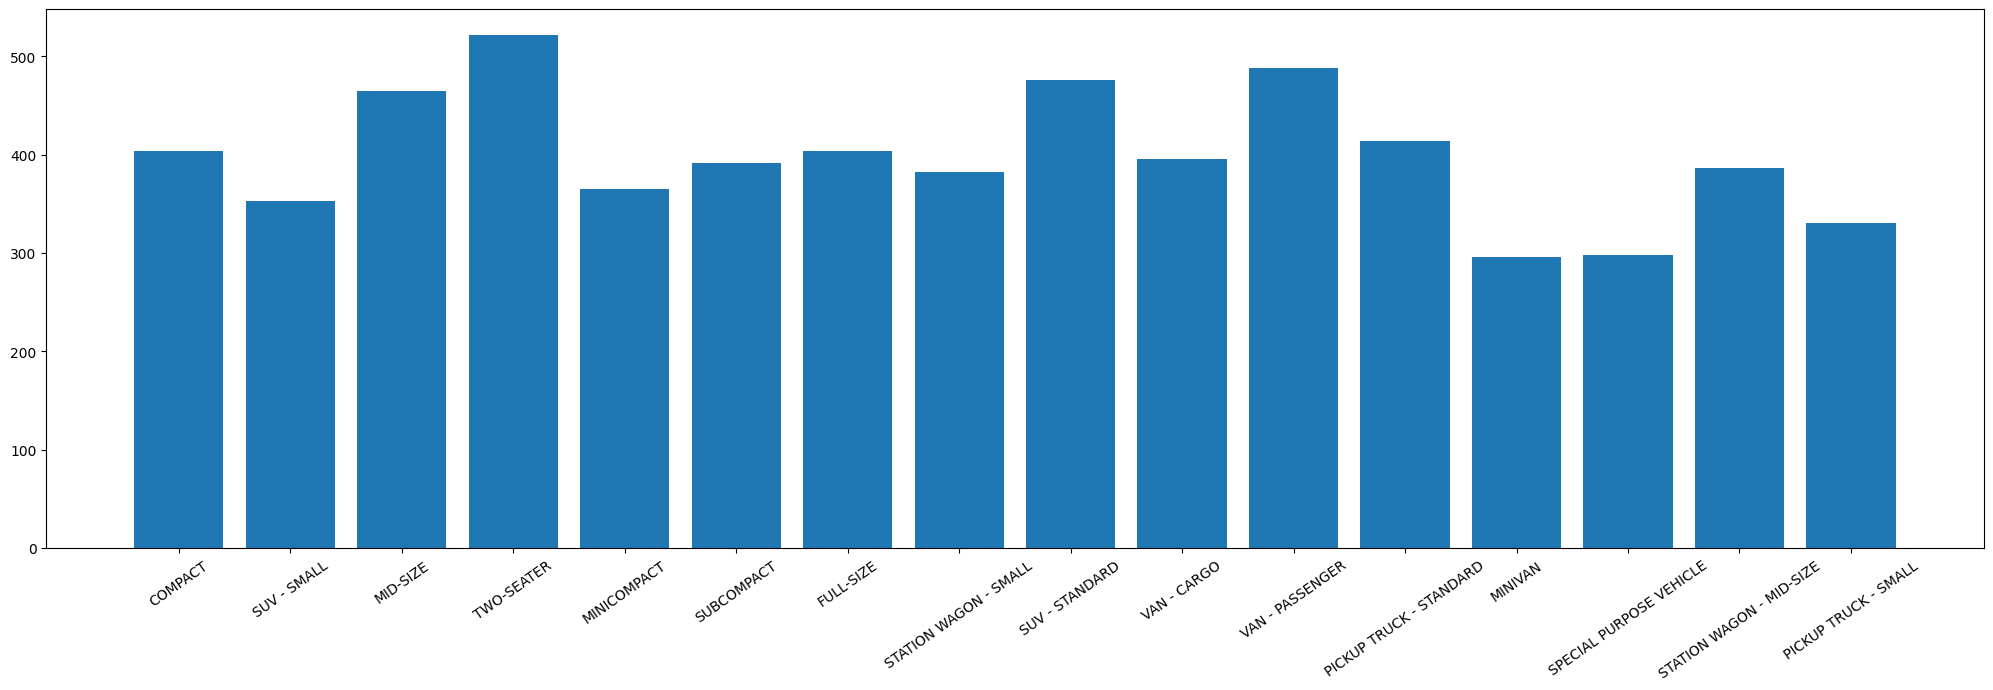

In [66]:
plt.subplots(figsize=(25,7))
plt.bar(ems['vehicle_class'],ems['co2_emissions'])
plt.xticks(rotation=35)
plt.show()

- Two Seater Vehicle class is giving out the most emission which is 520.

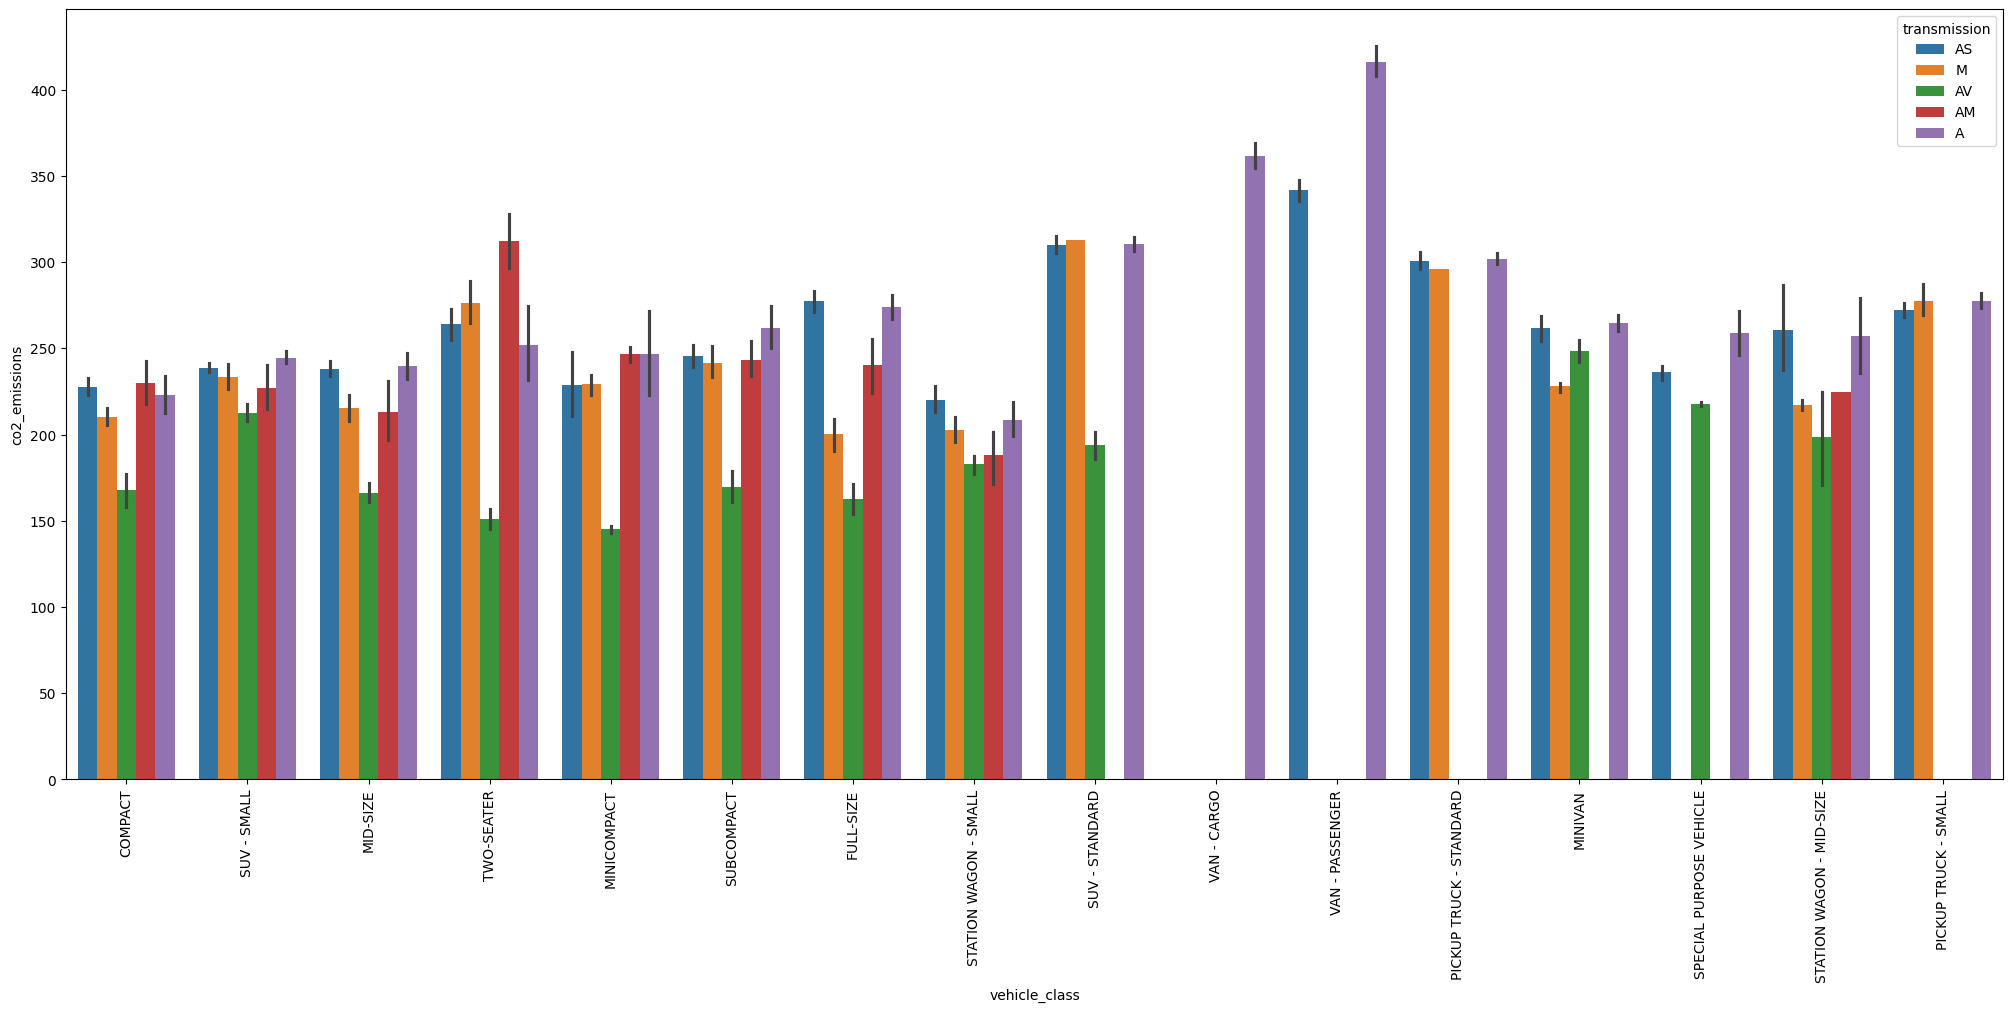

In [67]:
plt.subplots(figsize=(25,10))
sns.barplot(data=ems,x='vehicle_class',y='co2_emissions',hue='transmission')
plt.xticks(rotation=90)
plt.show()

- Automated Manual Transmission is the highest CO2 emission for Two Wheeler Vehicle Class

<Axes: xlabel='cylinders', ylabel='co2_emissions'>

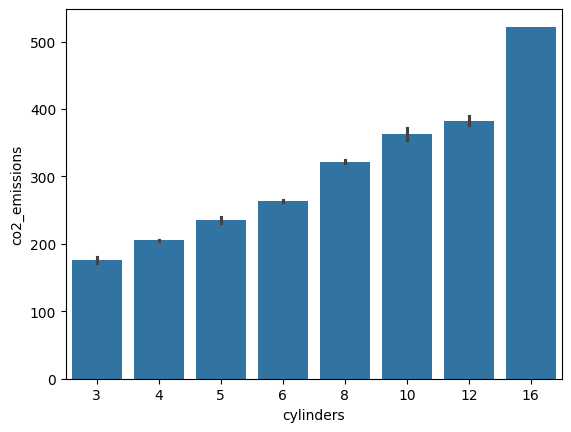

In [68]:
sns.barplot(data=ems,x='cylinders',y='co2_emissions')

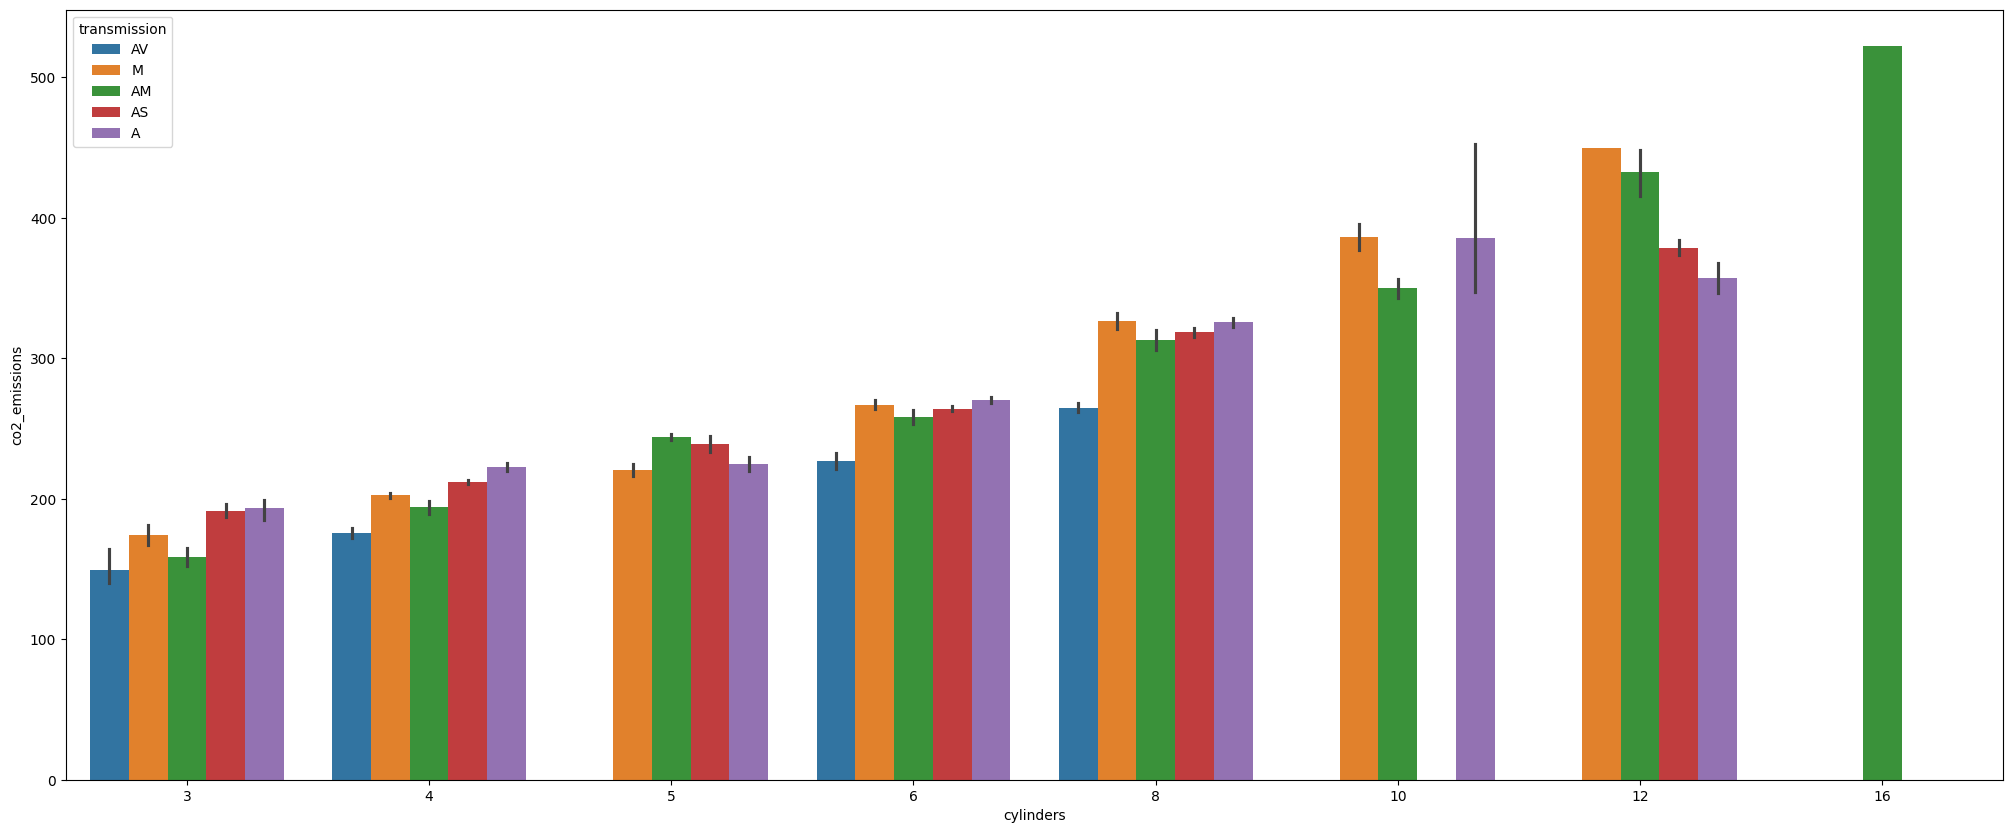

In [69]:
plt.subplots(figsize=(25,10))
sns.barplot(data=ems,x='cylinders',y='co2_emissions',hue='transmission')
plt.show()

- The increase in CO2 emissions in consistantly increasing for every increase in No. of Cylinders.
- The CO2 emissions for Automated Manual Transmission is increasing with increase in no. of Cylinders compared to other Transmissions   

<Axes: xlabel='transmission', ylabel='co2_emissions'>

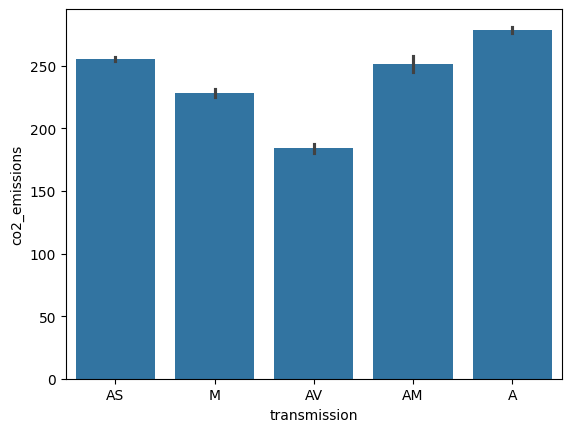

In [70]:
sns.barplot(data=ems,x='transmission',y='co2_emissions')

AS - Autimatic with selected shaft
M  - Manual
AV - Continuously Variable
AM - Automated Manual
A  - Automatic

<Axes: xlabel='transmission', ylabel='co2_emissions'>

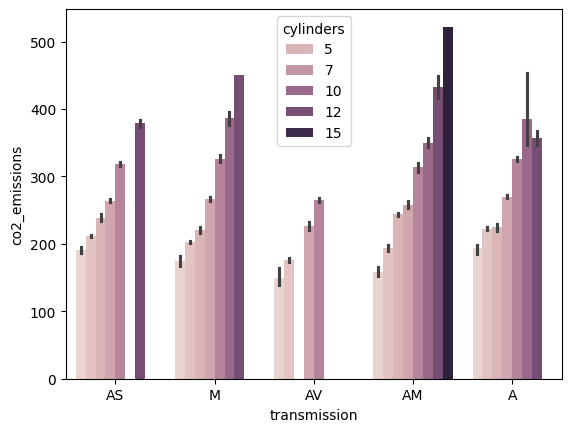

In [71]:
sns.barplot(data=ems,x='transmission',y='co2_emissions',hue='cylinders')

<Axes: xlabel='fuel_type', ylabel='co2_emissions'>

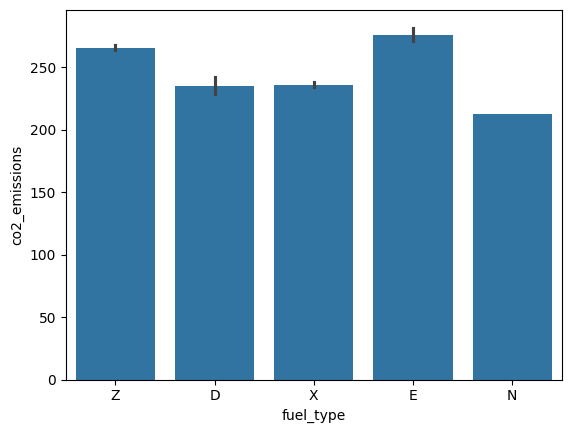

In [72]:
sns.barplot(data=ems,x='fuel_type',y='co2_emissions')

<Axes: xlabel='fuel_type', ylabel='co2_emissions'>

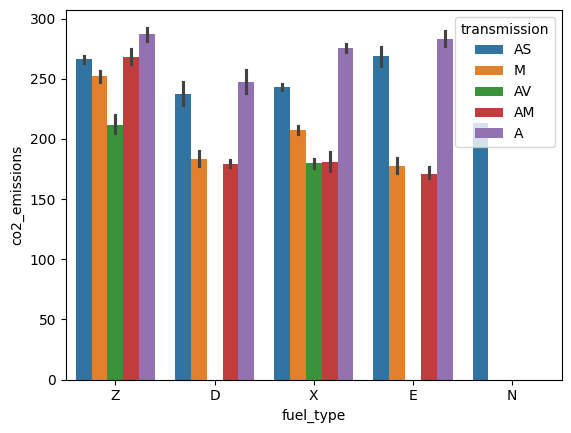

In [73]:
sns.barplot(data=ems,x='fuel_type',y='co2_emissions',hue='transmission')

Z - Premium Gasoline
D - Diesel
X - Regular Gasonine
E - Ethanol
N - Natural Gas

In [74]:
sns.heatmap(ems.corr(),annot=True)

ValueError: could not convert string to float: 'ACURA'

In [ ]:
plt.subplots(figsize=(25,10))
sns.countplot(data=ems,x='transmission',hue='fuel_type')

In [75]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
#ems['vehicle_class']=label_encoder.fit_transform(ems['vehicle_class'])
#ems['transmission']=label_encoder.fit_transform(ems['transmission'])
#ems['fuel_type']=label_encoder.fit_transform(ems['fuel_type'])

ValueError: could not convert string to float: 'ACURA'

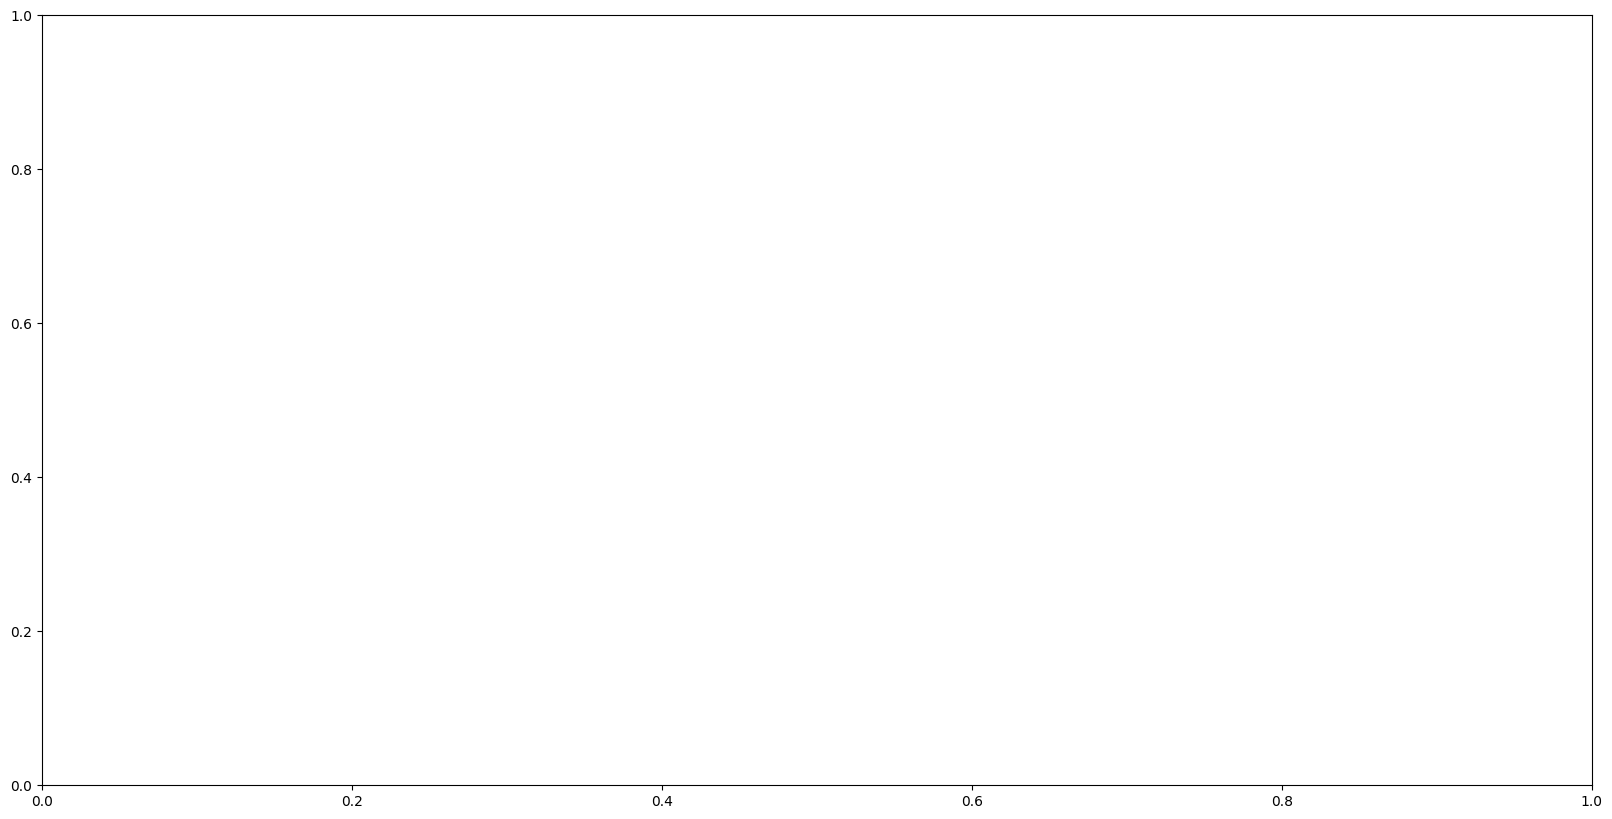

In [76]:
plt.subplots(figsize=(20,10))
sns.heatmap(ems.corr(),annot=True)

<Axes: xlabel='transmission', ylabel='co2_emissions'>

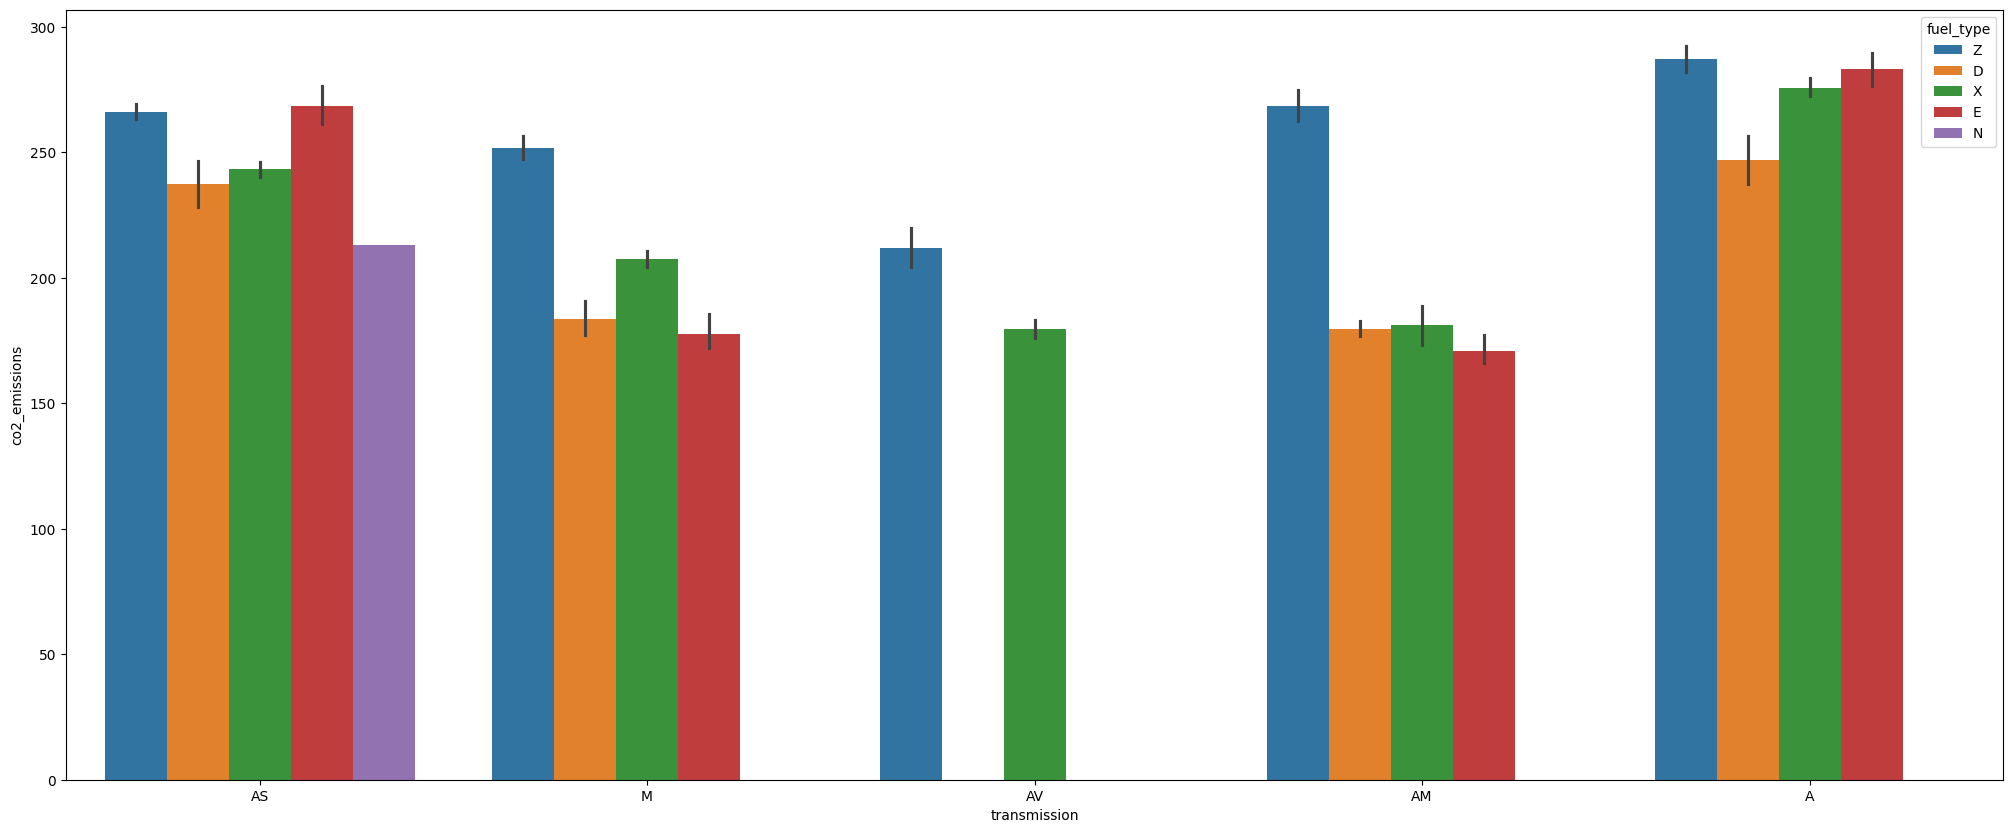

In [77]:
plt.subplots(figsize=(25,10))
sns.barplot(data=ems,x='transmission',y='co2_emissions',hue='fuel_type')

<Axes: xlabel='fuel_type', ylabel='co2_emissions'>

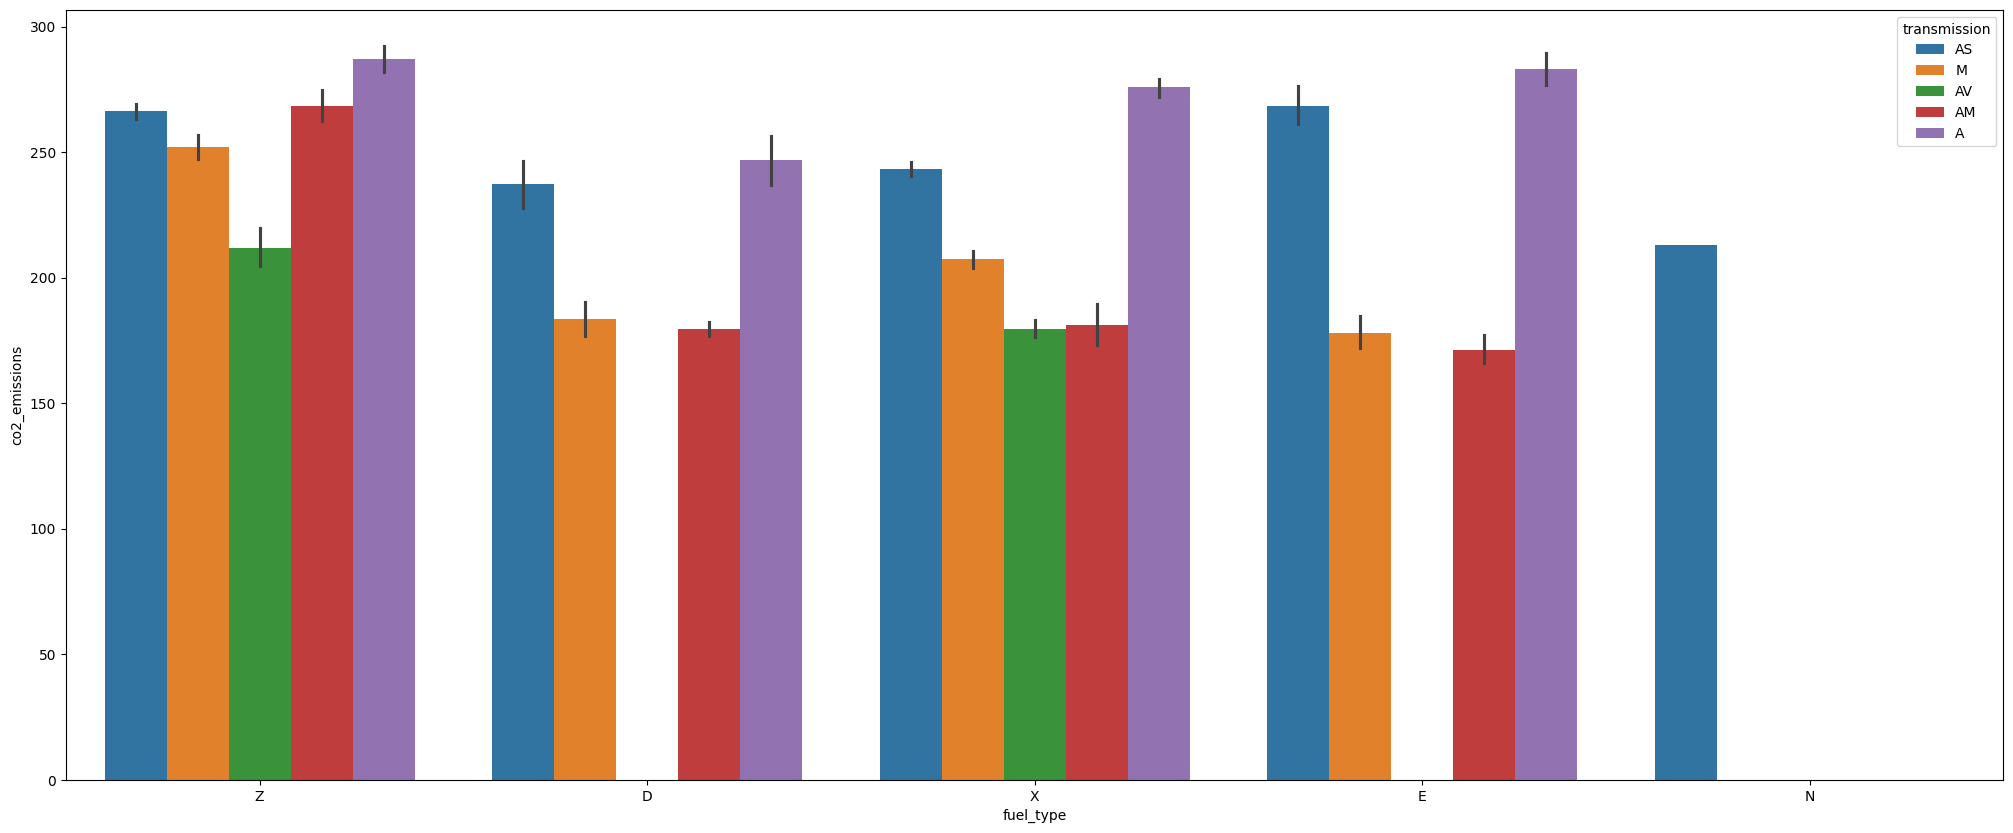

In [78]:
plt.subplots(figsize=(25,10))
sns.barplot(data=ems,x='fuel_type',y='co2_emissions',hue='transmission')

{'whiskers': [<matplotlib.lines.Line2D at 0x171601d0490>,
 'caps': [<matplotlib.lines.Line2D at 0x171601d09d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x171601d01f0>],
 'medians': [<matplotlib.lines.Line2D at 0x171601d0f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x171601d11b0>],
 'means': []}

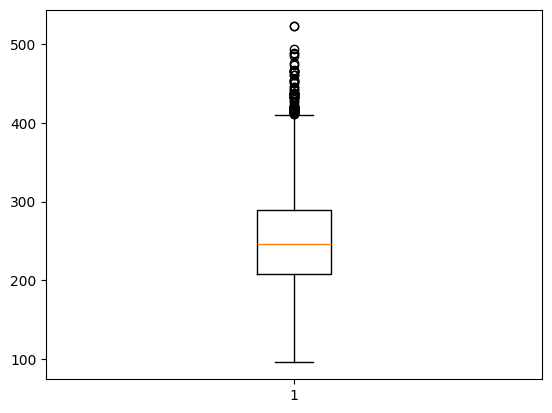

In [79]:
plt.boxplot(ems['co2_emissions'])

In [80]:
Q1 = ems['co2_emissions'].quantile(0.25)
Q3 = ems['co2_emissions'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print(lower)
print(upper)

86.5
410.5


In [81]:
np.where(ems['co2_emissions']> 410.5)

(array([  75,  223,  224,  225,  226,  227,  228,  349,  350,  391,  447,
         448,  449,  450,  451,  452,  637,  758, 1140, 1291, 1292, 1293,
        1294, 1295, 1296, 1297, 1298, 1450, 1451, 1452, 1453, 1454, 1455,
        1456, 1457, 1615, 1616, 1618, 1704, 1705, 2226, 2227, 2455, 2456,
        2661, 2662, 2759, 2760, 3115, 3153, 3300, 3301, 3506, 3507, 3702,
        3703, 3704, 3705, 3783, 3784, 4195, 4490, 4511, 4512, 4513, 4514,
        4576, 4577, 4828, 4891, 5286, 5321, 5322, 6112], dtype=int64),)

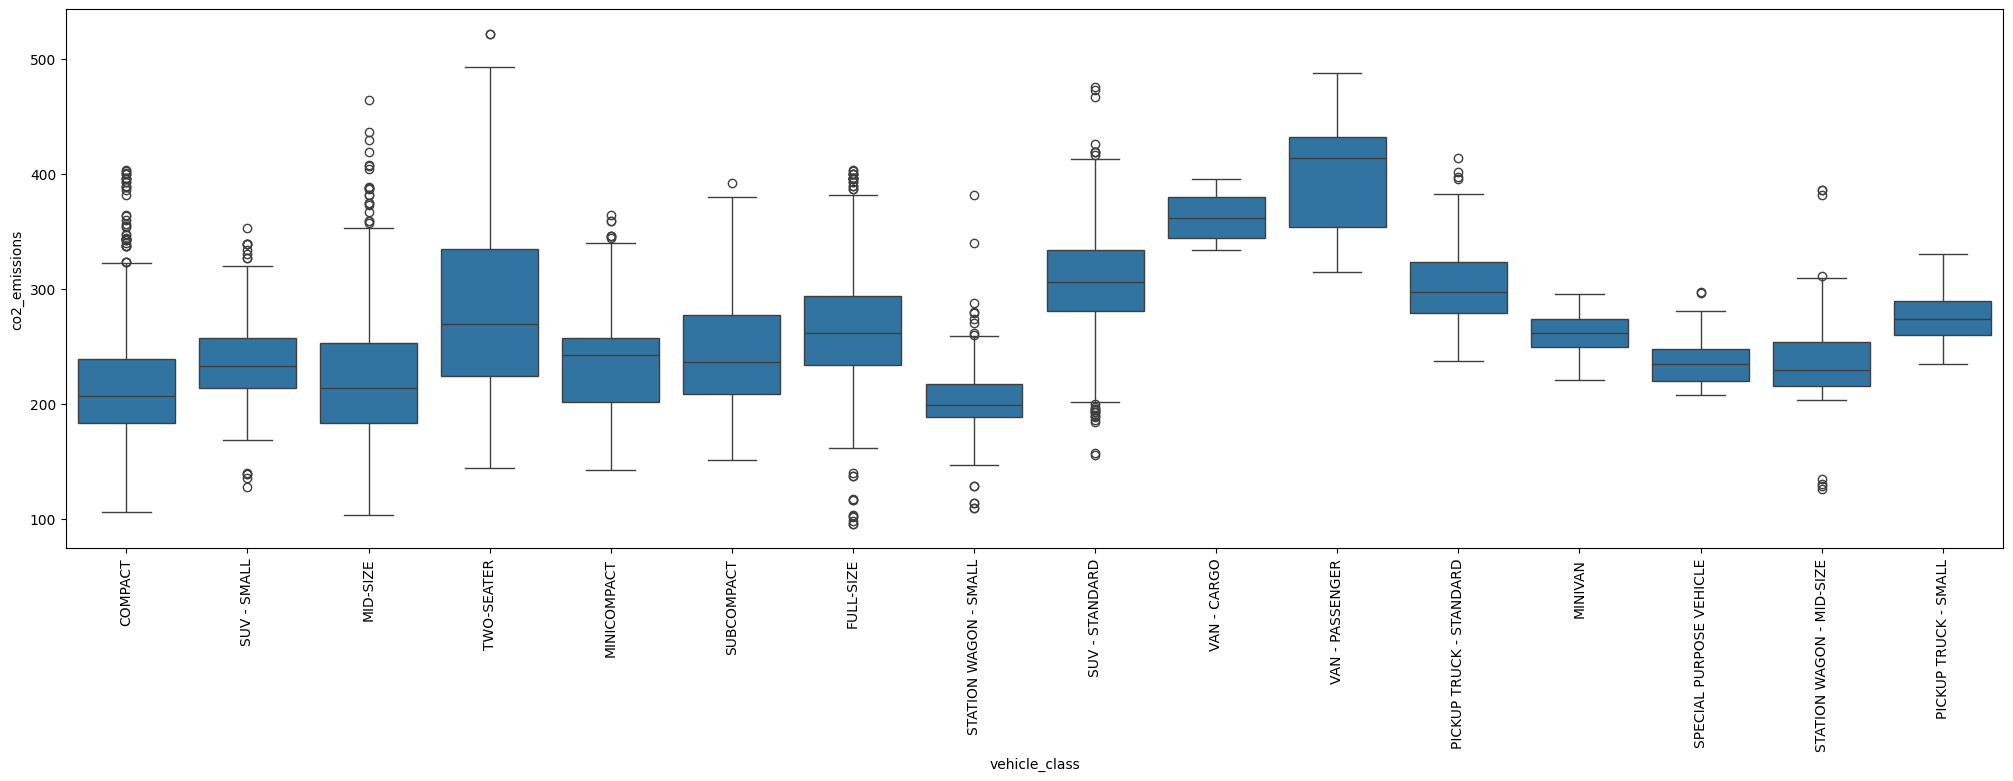

In [82]:
plt.subplots(figsize=(25,7))
sns.boxplot(x='vehicle_class',y='co2_emissions',data=ems)
plt.xticks(rotation=90)
plt.show()

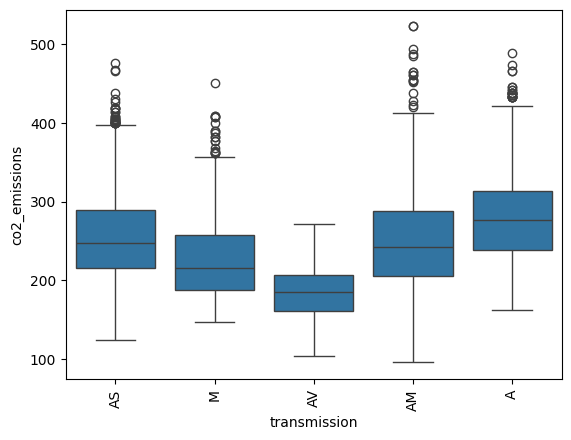

In [83]:
sns.boxplot(x='transmission',y='co2_emissions',data=ems)
plt.xticks(rotation=90)
plt.show()

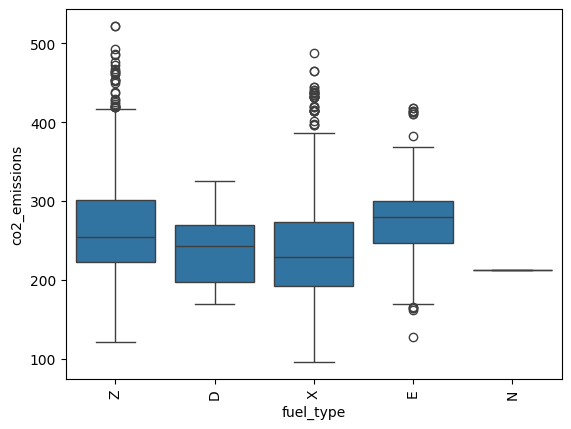

In [84]:
sns.boxplot(x='fuel_type',y='co2_emissions',data=ems)
plt.xticks(rotation=90)
plt.show()

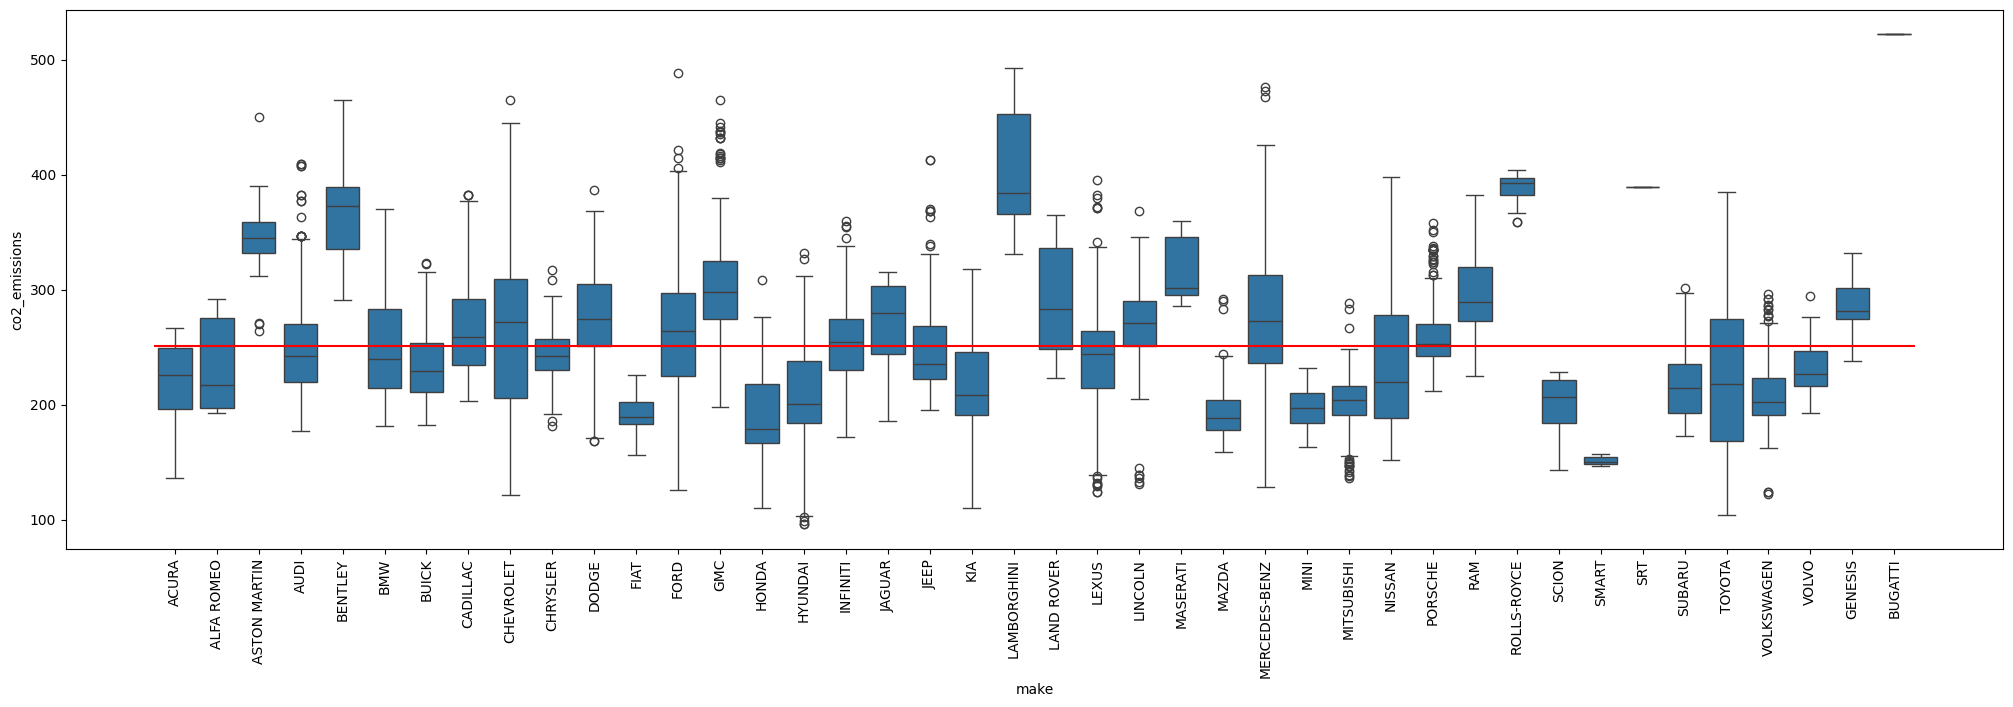

In [85]:
plt.subplots(figsize=(25,7))
sns.boxplot(x='make',y='co2_emissions',data=ems)
plt.xticks(rotation=90)
left, right = plt.xlim()
plt.hlines(ems['co2_emissions'].mean(),xmin=left, xmax=right,color='r')
plt.show()


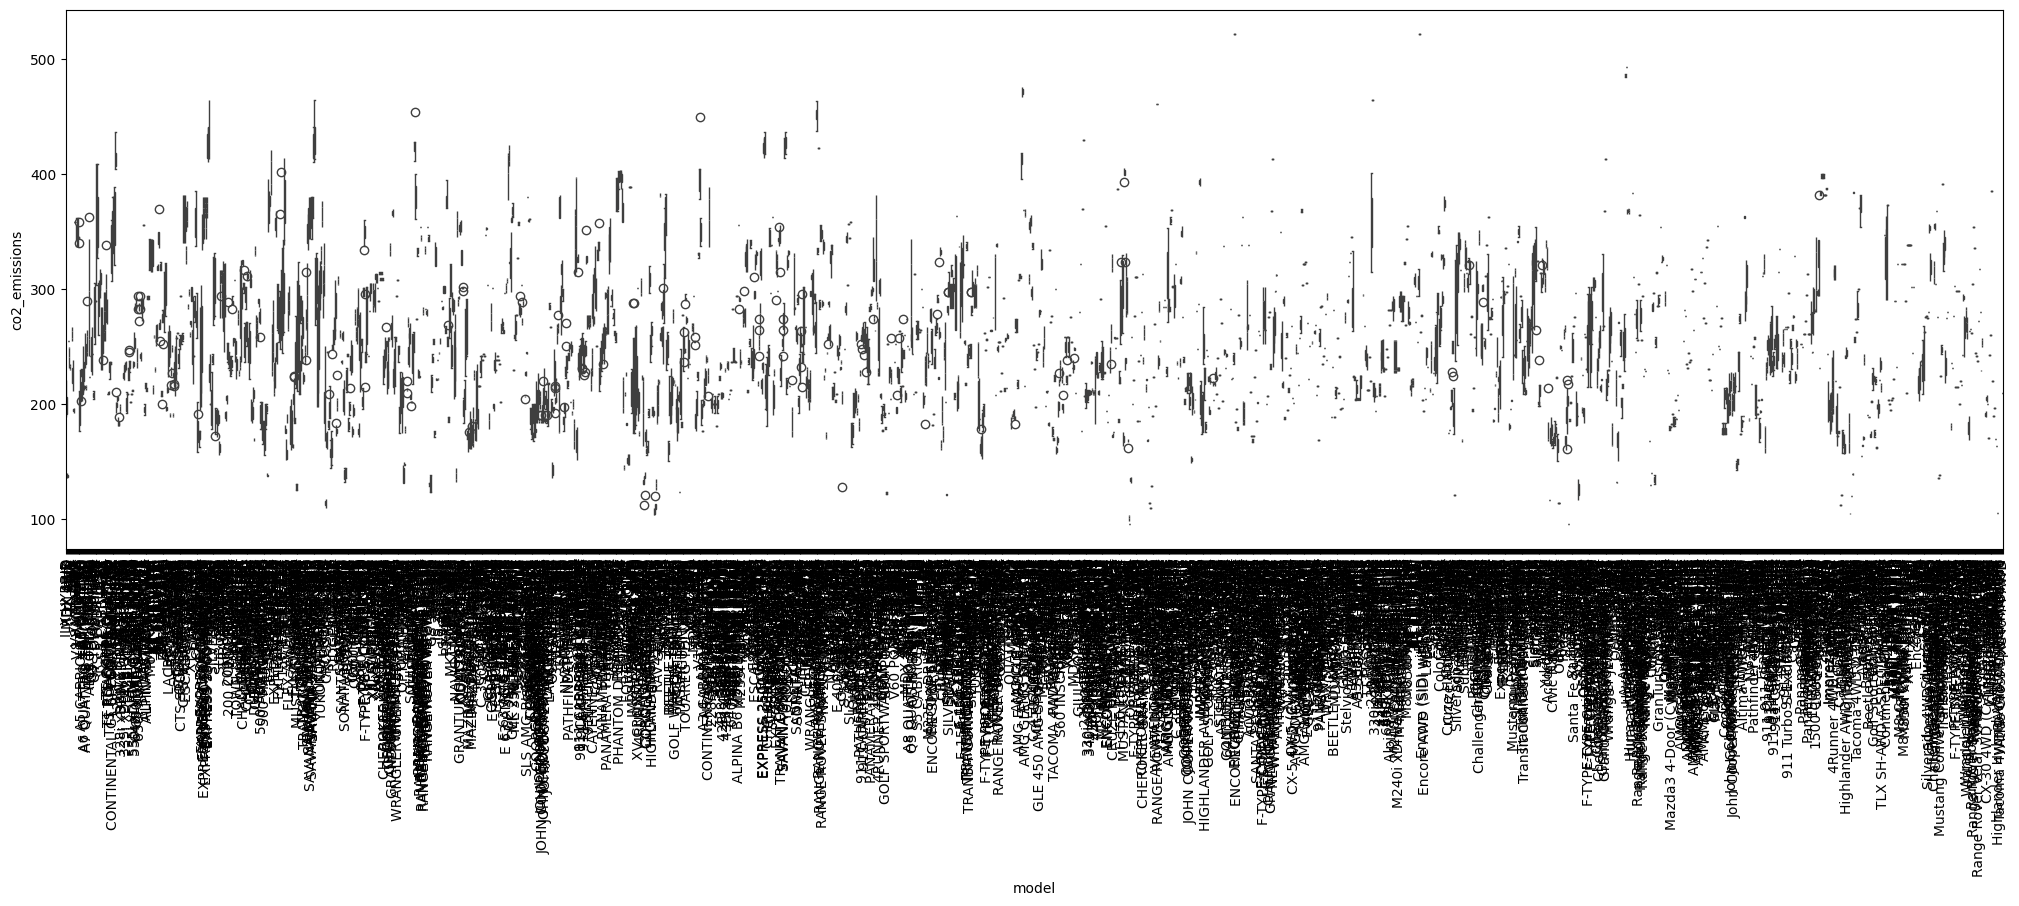

In [86]:
plt.subplots(figsize=(25,7))
sns.boxplot(x='model',y='co2_emissions',data=ems)
plt.xticks(rotation=90)
plt.show()

In [87]:
stats.f_oneway(ems_acura['co2_emissions'],ems_alfaromeo['co2_emissions'],ems_astonmartin['co2_emissions'],ems_audi['co2_emissions'],ems_bentley['co2_emissions'],ems_benz['co2_emissions'],ems_bmw['co2_emissions'],ems_bugatti['co2_emissions'],
               ems_buick['co2_emissions'],ems_cadillac['co2_emissions'],ems_chevrolet['co2_emissions'],ems_chrysler['co2_emissions'],ems_dodge['co2_emissions'],ems_fiat['co2_emissions'],ems_ford['co2_emissions'],ems_genesis['co2_emissions'],
               ems_gmc['co2_emissions'],ems_honda['co2_emissions'],ems_hyundai['co2_emissions'],ems_infiniti['co2_emissions'],ems_jaguar['co2_emissions'],ems_jeep['co2_emissions'],ems_kia['co2_emissions'],ems_lamb['co2_emissions'],
               ems_landrover['co2_emissions'],ems_lexus['co2_emissions'],ems_lincoln['co2_emissions'],ems_mini['co2_emissions'],ems_mitsubishi['co2_emissions'],ems_maserati['co2_emissions'],ems_mazda['co2_emissions'],ems_nissan['co2_emissions'],
               ems_porsche['co2_emissions'],ems_ram['co2_emissions'],ems_rollsroyce['co2_emissions'],ems_scion['co2_emissions'],ems_smart['co2_emissions'],ems_srt['co2_emissions'],ems_subaru['co2_emissions'],ems_toyota['co2_emissions'],
               ems_volkswagen['co2_emissions'],ems_volvo['co2_emissions'])

F_onewayResult(statistic=89.49476817697801, pvalue=0.0)

In [88]:
ems['vehicle_class'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

NULL HYPOTHESIS :- All the means are similar

ALTERNATE HYPOTHESIS :- Atleast one mean is different from the rest of the means

In [ ]:
v1=ems[ems['vehicle_class']=='COMPACT']
v2=ems[ems['vehicle_class']=='SUV - SMALL']
v3=ems[ems['vehicle_class']=='MID-SIZE']
v4=ems[ems['vehicle_class']=='TWO-SEATER']
v5=ems[ems['vehicle_class']=='MINICOMPACT']
v6=ems[ems['vehicle_class']=='SUBCOMPACT']
v7=ems[ems['vehicle_class']=='FULL-SIZE']
v8=ems[ems['vehicle_class']=='STATION WAGON - SMALL']
v9=ems[ems['vehicle_class']=='SUV - STANDARD']
v10=ems[ems['vehicle_class']=='VAN - CARGO']
v11=ems[ems['vehicle_class']=='VAN - PASSENGER']
v12=ems[ems['vehicle_class']=='PICKUP TRUCK - STANDARD']
v13=ems[ems['vehicle_class']=='MINIVAN']
v14=ems[ems['vehicle_class']=='SPECIAL PURPOSE VEHICLE']
v15=ems[ems['vehicle_class']=='STATION WAGON - MID-SIZE']
v16=ems[ems['vehicle_class']=='PICKUP TRUCK - SMALL']

In [ ]:
from scipy import stats
stats.f_oneway(v1['co2_emissions'],v2['co2_emissions'],v3['co2_emissions'],v4['co2_emissions'],v5['co2_emissions'],v6['co2_emissions'],v7['co2_emissions'],v8['co2_emissions'],
               v9['co2_emissions'],v10['co2_emissions'],v11['co2_emissions'],v12['co2_emissions'],v13['co2_emissions'],v14['co2_emissions'],v15['co2_emissions'],v16['co2_emissions'])

In [ ]:
f1=ems[ems['fuel_type']=='X']
f2=ems[ems['fuel_type']=='Z']
f3=ems[ems['fuel_type']=='D']
f4=ems[ems['fuel_type']=='E']
f5=ems[ems['fuel_type']=='N']

In [ ]:
stats.f_oneway(f1['co2_emissions'],f2['co2_emissions'],f3['co2_emissions'],f4['co2_emissions'],f5['co2_emissions'])

In [ ]:
t1=ems[ems['transmission']=='AS']
t2=ems[ems['transmission']=='AV']
t3=ems[ems['transmission']=='AM']
t4=ems[ems['transmission']=='A']
t5=ems[ems['transmission']=='M']

In [ ]:
stats.f_oneway(t1['co2_emissions'],t2['co2_emissions'],t3['co2_emissions'],t4['co2_emissions'],t5['co2_emissions'])

In [89]:
def norm_func(i):
    # Calculate normalized values by scaling each column in 'i' between 0 and 1
    x = (i - i.min()) / (i.max() - i.min())
    return x

# Apply the 'norm_ems' function to normalize the numerical columns in the 'churn' dataset (columns from index 3 onwards)
# Store the normalized dataset in 'churn_norm'

In [90]:
#sns.heatmap(ems_m.corr())

In [91]:
# Apply the 'norm_ems' function to normalize the numerical columns in the 'churn' dataset (columns from index 3 onwards)
# Store the normalized dataset in 'churn_norm'
ems_norm= norm_func(ems.iloc[:,7:11])
ems_norm_cyl=norm_func(ems.iloc[:,4])
ems_norm_eng=norm_func(ems.iloc[:,3])
ems_norm['co2_emission']=ems['co2_emissions']
ems_norm['make']=ems['make']
ems_norm['model']=ems['model']
ems_norm['vehicle_class']=ems['vehicle_class']
ems_norm['transmission']=ems['transmission']
ems_norm['fuel_type']=ems['fuel_type']
ems_norm['engine']=ems_norm_eng
ems_norm['cylinder']=ems_norm_cyl
ems_norm['transmission']=ems['transmission']
ems_norm['fuel_type']=ems['fuel_type']
ems_norm.rename(columns={'fuel_consumption_comb(l/100km)':'fuel_both','fuel_consumption_comb(mpg)':'fuel_both_mpg'},inplace=True)
ems_norm

,fuel_consumption_city,fuel_consumption_hwy,fuel_both,fuel_both_mpg,co2_emission,make,model,vehicle_class,transmission,fuel_type,engine,cylinder
0,0.215909,0.162651,0.200000,0.379310,196,ACURA,ILX,COMPACT,AS,Z,0.146667,0.076923
1,0.265152,0.222892,0.250000,0.310345,221,ACURA,ILX,COMPACT,M,Z,0.200000,0.076923
2,0.068182,0.108434,0.081818,0.637931,136,ACURA,ILX HYBRID,COMPACT,AV,Z,0.080000,0.076923
3,0.321970,0.307229,0.318182,0.241379,255,ACURA,MDX 4WD,SUV - SMALL,AS,Z,0.346667,0.230769
4,0.299242,0.283133,0.295455,0.275862,244,ACURA,RDX AWD,SUV - SMALL,AS,Z,0.346667,0.230769
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,0.246212,0.222892,0.240909,0.327586,219,VOLVO,XC40 T5 AWD,SUV - SMALL,AS,Z,0.146667,0.076923
7381,0.265152,0.259036,0.263636,0.310345,232,VOLVO,XC60 T5 AWD,SUV - SMALL,AS,Z,0.146667,0.076923
7382,0.284091,0.277108,0.281818,0.275862,240,VOLVO,XC60 T6 AWD,SUV - SMALL,AS,Z,0.146667,0.076923
7383,0.265152,0.259036,0.263636,0.310345,232,VOLVO,XC90 T5 AWD,SUV - STANDARD,AS,Z,0.146667,0.076923


Experimantal Dummies

In [92]:
ems_norm_1= norm_func(ems.iloc[:,7:])
ems_norm_cyl=norm_func(ems.iloc[:,4])
ems_norm_eng=norm_func(ems.iloc[:,3])
ems_norm_1['make']=ems['make']
ems_norm_1['model']=ems['model']
ems_norm_1['vehicle_class']=ems['vehicle_class']
ems_norm_1['transmission']=ems['transmission']
ems_norm_1['fuel_type']=ems['fuel_type']
ems_norm_1['engine']=ems_norm_eng
ems_norm_1['cylinder']=ems_norm_cyl
ems_norm.rename(columns={'fuel_consumption_comb(l/100km)':'fuel_both','fuel_consumption_comb(mpg)':'fuel_both_mpg'},inplace=True)
ems_norm_1=pd.get_dummies(ems_norm_1,columns=['make','model','vehicle_class','transmission','fuel_type'])
ems_norm_1

,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions,engine,cylinder,make_ACURA,make_ALFA ROMEO,make_ASTON MARTIN,...,transmission_A,transmission_AM,transmission_AS,transmission_AV,transmission_M,fuel_type_D,fuel_type_E,fuel_type_N,fuel_type_X,fuel_type_Z
0,0.215909,0.162651,0.200000,0.379310,0.234742,0.146667,0.076923,True,False,False,...,False,False,True,False,False,False,False,False,False,True
1,0.265152,0.222892,0.250000,0.310345,0.293427,0.200000,0.076923,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0.068182,0.108434,0.081818,0.637931,0.093897,0.080000,0.076923,True,False,False,...,False,False,False,True,False,False,False,False,False,True
3,0.321970,0.307229,0.318182,0.241379,0.373239,0.346667,0.230769,True,False,False,...,False,False,True,False,False,False,False,False,False,True
4,0.299242,0.283133,0.295455,0.275862,0.347418,0.346667,0.230769,True,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,0.246212,0.222892,0.240909,0.327586,0.288732,0.146667,0.076923,False,False,False,...,False,False,True,False,False,False,False,False,False,True
7381,0.265152,0.259036,0.263636,0.310345,0.319249,0.146667,0.076923,False,False,False,...,False,False,True,False,False,False,False,False,False,True
7382,0.284091,0.277108,0.281818,0.275862,0.338028,0.146667,0.076923,False,False,False,...,False,False,True,False,False,False,False,False,False,True
7383,0.265152,0.259036,0.263636,0.310345,0.319249,0.146667,0.076923,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [ ]:
import statsmodels.api as sm
y=ems_norm_1['co2_emissions']
x=ems_norm_1.drop(['co2_emissions'],axis=1)
model=sm.OLS(y,x).fit()
model.summary()

- The Features when compared to CO2 Emissions we can see that the P values of Fuel Comsumption in City, Fuel consumption in Highway, Fuel consumption in both, Fuel consumption MPG, Engine Size, Cylinders, Vehicle Class, Transmission and Fuel Type are less than 0.05. So we will consider them for model and checl for multi collinearity usinf VIF.

- The P values for 11 unique Make's are more than 0.05 and there are many records with P values greater than 0.05 for Model.

In [93]:
ems_norm_2= norm_func(ems.iloc[:,7:])
ems_norm_cyl=norm_func(ems.iloc[:,4])
ems_norm_eng=norm_func(ems.iloc[:,3])
ems_norm_2['vehicle_class']=ems['vehicle_class']
ems_norm_2['transmission']=ems['transmission']
ems_norm_2['fuel_type']=ems['fuel_type']
ems_norm_2['make']=ems['make']
ems_norm_2['model']=ems['model']
ems_norm_2['engine']=ems_norm_eng
ems_norm_2['cylinder']=ems_norm_cyl
ems_norm_2.rename(columns={'fuel_consumption_comb(l/100km)':'fuel_both','fuel_consumption_comb(mpg)':'fuel_both_mpg'},inplace=True)
ems_norm_2

,fuel_consumption_city,fuel_consumption_hwy,fuel_both,fuel_both_mpg,co2_emissions,vehicle_class,transmission,fuel_type,make,model,engine,cylinder
0,0.215909,0.162651,0.200000,0.379310,0.234742,COMPACT,AS,Z,ACURA,ILX,0.146667,0.076923
1,0.265152,0.222892,0.250000,0.310345,0.293427,COMPACT,M,Z,ACURA,ILX,0.200000,0.076923
2,0.068182,0.108434,0.081818,0.637931,0.093897,COMPACT,AV,Z,ACURA,ILX HYBRID,0.080000,0.076923
3,0.321970,0.307229,0.318182,0.241379,0.373239,SUV - SMALL,AS,Z,ACURA,MDX 4WD,0.346667,0.230769
4,0.299242,0.283133,0.295455,0.275862,0.347418,SUV - SMALL,AS,Z,ACURA,RDX AWD,0.346667,0.230769
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,0.246212,0.222892,0.240909,0.327586,0.288732,SUV - SMALL,AS,Z,VOLVO,XC40 T5 AWD,0.146667,0.076923
7381,0.265152,0.259036,0.263636,0.310345,0.319249,SUV - SMALL,AS,Z,VOLVO,XC60 T5 AWD,0.146667,0.076923
7382,0.284091,0.277108,0.281818,0.275862,0.338028,SUV - SMALL,AS,Z,VOLVO,XC60 T6 AWD,0.146667,0.076923
7383,0.265152,0.259036,0.263636,0.310345,0.319249,SUV - STANDARD,AS,Z,VOLVO,XC90 T5 AWD,0.146667,0.076923


In [94]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
ems_norm_2['vehicle_class']=labelencoder.fit_transform(ems_norm_2['vehicle_class'])
ems_norm_2['transmission']=labelencoder.fit_transform(ems_norm_2['transmission'])
ems_norm_2['fuel_type']=labelencoder.fit_transform(ems_norm_2['fuel_type'])
ems_norm_2['make']=labelencoder.fit_transform(ems_norm_2['make'])
ems_norm_2['model']=labelencoder.fit_transform(ems_norm_2['model'])
ems_norm_2

,fuel_consumption_city,fuel_consumption_hwy,fuel_both,fuel_both_mpg,co2_emissions,vehicle_class,transmission,fuel_type,make,model,engine,cylinder
0,0.215909,0.162651,0.200000,0.379310,0.234742,0,2,4,0,1057,0.146667,0.076923
1,0.265152,0.222892,0.250000,0.310345,0.293427,0,4,4,0,1057,0.200000,0.076923
2,0.068182,0.108434,0.081818,0.637931,0.093897,0,3,4,0,1058,0.080000,0.076923
3,0.321970,0.307229,0.318182,0.241379,0.373239,11,2,4,0,1233,0.346667,0.230769
4,0.299242,0.283133,0.295455,0.275862,0.347418,11,2,4,0,1499,0.346667,0.230769
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,0.246212,0.222892,0.240909,0.327586,0.288732,11,2,4,41,1951,0.146667,0.076923
7381,0.265152,0.259036,0.263636,0.310345,0.319249,11,2,4,41,1957,0.146667,0.076923
7382,0.284091,0.277108,0.281818,0.275862,0.338028,11,2,4,41,1960,0.146667,0.076923
7383,0.265152,0.259036,0.263636,0.310345,0.319249,12,2,4,41,1968,0.146667,0.076923


In [ ]:
r2_m=smf.ols('make~model+vehicle_class+engine+cylinder+transmission+fuel_type+fuel_consumption_city+fuel_consumption_hwy+fuel_both+fuel_both_mpg',data=ems_norm_2).fit().rsquared
vif_m=1/(1-r2_m)

r2_model=smf.ols('model~make+vehicle_class+engine+cylinder+transmission+fuel_type+fuel_consumption_city+fuel_consumption_hwy+fuel_both+fuel_both_mpg',data=ems_norm_2).fit().rsquared
vif_model=1/(1-r2_model)

r2_vc=smf.ols('vehicle_class~make+model+engine+cylinder+transmission+fuel_type+fuel_consumption_city+fuel_consumption_hwy+fuel_both+fuel_both_mpg',data=ems_norm_2).fit().rsquared
vif_vc=1/(1-r2_vc)

r2_e=smf.ols('engine~make+model+vehicle_class+cylinder+transmission+fuel_type+fuel_consumption_city+fuel_consumption_hwy+fuel_both+fuel_both_mpg',data=ems_norm_2).fit().rsquared
vif_e=1/(1-r2_e)

r2_c=smf.ols('cylinder~make+model+vehicle_class+engine+transmission+fuel_type+fuel_consumption_city+fuel_consumption_hwy+fuel_both+fuel_both_mpg',data=ems_norm_2).fit().rsquared
vif_c=1/(1-r2_c)

r2_t=smf.ols('transmission~make+model+vehicle_class+engine+cylinder+fuel_type+fuel_consumption_city+fuel_consumption_hwy+fuel_both+fuel_both_mpg',data=ems_norm_2).fit().rsquared
vif_t=1/(1-r2_t)

r2_ft=smf.ols('fuel_type~make+model+vehicle_class+engine+cylinder+transmission+fuel_consumption_city+fuel_consumption_hwy+fuel_both+fuel_both_mpg',data=ems_norm_2).fit().rsquared
vif_ft=1/(1-r2_ft)

r2_fc=smf.ols('fuel_consumption_city~make+model+vehicle_class+engine+cylinder+transmission+fuel_type+fuel_consumption_hwy+fuel_both+fuel_both_mpg',data=ems_norm_2).fit().rsquared
vif_fc=1/(1-r2_fc)

r2_fh=smf.ols('fuel_consumption_hwy~make+model+vehicle_class+engine+cylinder+transmission+fuel_type+fuel_consumption_city+fuel_both+fuel_both_mpg',data=ems_norm_2).fit().rsquared
vif_fh=1/(1-r2_fh)

r2_fl=smf.ols('fuel_both~make+model+vehicle_class+engine+cylinder+transmission+fuel_type+fuel_consumption_city+fuel_consumption_hwy+fuel_both_mpg',data=ems_norm_2).fit().rsquared
vif_fl=1/(1-r2_fl)

r2_fm=smf.ols('fuel_both_mpg~make+model+vehicle_class+engine+cylinder+transmission+fuel_type+fuel_consumption_city+fuel_consumption_hwy+fuel_both',data=ems_norm_2).fit().rsquared
vif_fm=1/(1-r2_fm)


df={'Variables':['make','model','Vehicle class','engine size','cylinder','transmsission','fuel type','fuel consumption city','fuel consumption hwy','fuel both l/100 km','fuel both mpg'],'Vif':[vif_m,vif_model,vif_vc,vif_e,vif_c,vif_t,vif_ft,vif_fc,vif_fh,vif_fl,vif_fm]}
CO2_VIF=pd.DataFrame(df)
CO2_VIF

In [ ]:
r2_m=smf.ols('make~model+vehicle_class+cylinder+transmission+fuel_type++fuel_consumption_hwy+fuel_both_mpg',data=ems_norm_2).fit().rsquared
vif_m=1/(1-r2_m)

r2_model=smf.ols('model~make+vehicle_class+cylinder+transmission+fuel_type+fuel_consumption_hwy+fuel_both_mpg',data=ems_norm_2).fit().rsquared
vif_model=1/(1-r2_model)

r2_vc=smf.ols('vehicle_class~make+model+cylinder+transmission+fuel_type+fuel_consumption_hwy+fuel_both_mpg',data=ems_norm_2).fit().rsquared
vif_cc=1/(1-r2_vc)

r2_c=smf.ols('cylinder~make+model+vehicle_class+transmission+fuel_type+fuel_consumption_hwy+fuel_both_mpg',data=ems_norm_2).fit().rsquared
vif_c=1/(1-r2_c)

r2_t=smf.ols('transmission~make+model+vehicle_class+cylinder+fuel_type+fuel_consumption_hwy+fuel_both_mpg',data=ems_norm_2).fit().rsquared
vif_t=1/(1-r2_t)

r2_ft=smf.ols('fuel_type~make+model+vehicle_class+cylinder+transmission+fuel_consumption_hwy+fuel_both_mpg',data=ems_norm_2).fit().rsquared
vif_ft=1/(1-r2_ft)

r2_fh=smf.ols('fuel_consumption_hwy~make+model+vehicle_class+cylinder+transmission+fuel_type+fuel_both_mpg',data=ems_norm_2).fit().rsquared
vif_fh=1/(1-r2_fh)

r2_fm=smf.ols('fuel_both_mpg~make+model+vehicle_class+cylinder+transmission+fuel_type+fuel_consumption_hwy',data=ems_norm_2).fit().rsquared
vif_fm=1/(1-r2_fm)


df={'Variables':['make','model','Vehicle class','cylinder','transmission','fuel type','fuel consumption highway','Miles per gallon'],'Vif':[vif_m,vif_model,vif_vc,vif_c,vif_t,vif_ft,vif_fh,vif_fm]}
CO2_VIF=pd.DataFrame(df)
CO2_VIF

In [ ]:
r2_fc=smf.ols('fuel_consumption_city~make+model+vehicle_class+cylinder+transmission+fuel_type+fuel_both_mpg',data=ems_norm_2).fit().rsquared
vif_fc=1/(1-r2_fc)
vif_fc

In [ ]:
r2_fl=smf.ols('fuel_both~make+model+vehicle_class+cylinder+transmission+fuel_type+fuel_both_mpg',data=ems_norm_2).fit().rsquared
vif_fl=1/(1-r2_fl)
vif_fl

In [ ]:
r2_m=smf.ols('make~model+vehicle_class+cylinder+transmission+fuel_type+fuel_both_mpg',data=ems_norm_2).fit().rsquared
vif_m=1/(1-r2_m)

r2_model=smf.ols('model~make+vehicle_class+cylinder+transmission+fuel_type+fuel_both_mpg',data=ems_norm_2).fit().rsquared
vif_model=1/(1-r2_model)

r2_vc=smf.ols('vehicle_class~make+model+cylinder+transmission+fuel_type+fuel_both_mpg',data=ems_norm_2).fit().rsquared
vif_cc=1/(1-r2_vc)

r2_c=smf.ols('cylinder~make+model+vehicle_class+transmission+fuel_type+fuel_both_mpg',data=ems_norm_2).fit().rsquared
vif_c=1/(1-r2_c)

r2_t=smf.ols('transmission~make+model+vehicle_class+cylinder+fuel_type+fuel_both_mpg',data=ems_norm_2).fit().rsquared
vif_t=1/(1-r2_t)

r2_ft=smf.ols('fuel_type~make+model+vehicle_class+cylinder+transmission+fuel_both_mpg',data=ems_norm_2).fit().rsquared
vif_ft=1/(1-r2_ft)


r2_fm=smf.ols('fuel_both_mpg~make+model+vehicle_class+cylinder+transmission+fuel_type',data=ems_norm_2).fit().rsquared
vif_fm=1/(1-r2_fm)


df={'Variables':['make','model','Vehicle class','cylinder','transmission','fuel type','Miles per gallon'],'Vif':[vif_m,vif_model,vif_vc,vif_c,vif_t,vif_ft,vif_fm]}
CO2_VIF=pd.DataFrame(df)
CO2_VIF

In [ ]:
r2_fh=smf.ols('fuel_consumption_hwy~make+model+vehicle_class+cylinder+transmission+fuel_type',data=ems_norm_2).fit().rsquared
vif_fh=1/(1-r2_fh)
vif_fh

We are considering the following features for model building
- Vehicle Class
- Cylinders
- Transmission
- Fuel Type
- Miles Per Gallon


# Model Building


- Considering Make and Model   ** Multi Linear Regression**

In [ ]:
X=ems_norm_2.drop(['co2_emissions','engine','fuel_consumption_city','fuel_consumption_hwy','fuel_both'],axis=1)
Y=ems_norm_2['co2_emissions']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
lr=LinearRegression()
model_lr=lr.fit(x_train,y_train)
y_pred_test=model_lr.predict(x_test)
y_pred_train=model_lr.predict(x_train)
print('Training Accuracy = ',accuracy_score(y_pred_train.round(),y_train.round()))
print('Testing Accuracy = ' ,accuracy_score(y_pred_test.round(),y_test.round()))

- Considering Make and not Model  ** Multi Linear Regression**

In [ ]:
x_=ems_norm_2.drop(['co2_emissions','engine','model','fuel_consumption_city','fuel_consumption_hwy','fuel_both'],axis=1)
y_=ems_norm_2['co2_emissions']
X_train,X_test,Y_train,Y_test=train_test_split(x_,y_,test_size=0.2)
model_1_lr=lr.fit(X_train,Y_train)
y_pred_test=model_1_lr.predict(X_test)
y_pred_train=model_1_lr.predict(X_train)
print('Training Accuracy = ',accuracy_score(y_pred_train.round(),Y_train.round()))
print('Testing Accuracy = ' ,accuracy_score(y_pred_test.round(),Y_test.round()))

- Excluding Both Make and Model  ** Multi Linear Regression**

In [ ]:
x_b=ems_norm_2.drop(['co2_emissions','make','model','engine','fuel_consumption_city','fuel_consumption_hwy','fuel_both'],axis=1)
y_b=ems_norm_2['co2_emissions']
x_b_train,x_b_test,y_b_train,y_b_test=train_test_split(x_b,y_b,test_size=0.2)
model_b_lr=lr.fit(x_b_train,y_b_train)
y_pred_test=model_b_lr.predict(x_b_test)
y_pred_train=model_b_lr.predict(x_b_train)
print('Training Accuracy = ',accuracy_score(y_pred_train.round(),y_b_train.round()))
print('Testing Accuracy = ' ,accuracy_score(y_pred_test.round(),y_b_test.round()))

Considering MOdel and not Make

In [349]:
_x_=ems_norm_2.drop(['co2_emissions','make','engine','fuel_consumption_city','fuel_consumption_hwy','fuel_both'],axis=1)
_y_b=ems_norm_2['co2_emissions']
_x_train,_x_test,_y_train,_y_test=train_test_split(_x_,_y_b,test_size=0.2)
model_b_lr=lr.fit(_x_train,_y_train)
y_pred_test=model_b_lr.predict(_x_test)
y_pred_train=model_b_lr.predict(_x_train)
print('Training Accuracy = ',accuracy_score(y_pred_train.round(),_y_train.round()))
print('Testing Accuracy = ' ,accuracy_score(y_pred_test.round(),_y_test.round()))

Training Accuracy =  0.9449980071741729
Testing Accuracy =  0.951394422310757


# Model Building and Cross Validation

- Multi Linear Regression Without Considering Vehicle Class

In [350]:
ems_1=ems.copy()
ems_1=pd.get_dummies(ems,columns=['transmission','fuel_type'])
#ems_1['fuel_consumption_comb(mpg)']=norm_func(ems_1['fuel_consumption_comb(mpg)'])

a=ems_1.drop(['make','model','vehicle_class','engine_size','fuel_consumption_city','fuel_consumption_hwy','fuel_consumption_comb(l/100km)','co2_emissions'],axis=1)
b=ems_1['co2_emissions']

a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2,random_state=42)

experiment=lr.fit(a_train,b_train)

b_pred=experiment.predict(a_test)

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True)

cv_results_r2 = cross_val_score(experiment, a, b, cv=kf, scoring='r2')
rmse = np.sqrt(mean_squared_error(b_test,b_pred))
mae = mean_absolute_error(b_test,b_pred)
print( 'Cross Valisation Result for R^2 Values using LINEAR REGRESSION Model : ',cv_results_r2)
print( 'RMSE Values using LINEAR REGRESSION Model : ',rmse)
print( 'Mean Absolute Error : ',mae)
ape3 = np.abs((b_test - b_pred) / b_test)
mapd3 = np.mean(ape3) * 100
print(f'Mean Absolute Percentage Deviation: {mapd3}%')
result_pred = pd.DataFrame({"Pred_LR": b_pred, "Real_Value": b_test.values})
result_pred["Pred_LR"] = result_pred["Pred_LR"].round(2)
result_pred["Diff"] = result_pred["Pred_LR"] - result_pred["Real_Value"]
print(result_pred.head(10))

Cross Valisation Result for R^2 Values using LINEAR REGRESSION Model :  [0.91848091 0.92771749 0.91827138 0.92935208 0.92798641]
RMSE Values using LINEAR REGRESSION Model :  16.859877322377454
Mean Absolute Error :  11.073396173634043
Mean Absolute Percentage Deviation: 4.507707073841329%
   Pred_LR  Real_Value   Diff
0   182.44         189  -6.56
1   267.37         242  25.37
2   227.50         234  -6.50
3   313.91         306   7.91
4   164.70         172  -7.30
5   307.63         290  17.63
6   286.03         285   1.03
7   164.70         172  -7.30
8   171.16         169   2.16
9   240.06         244  -3.94


- Multi Linear Regression Considering Vehicle Class

In [351]:
ems_1=ems.copy()
ems_1=pd.get_dummies(ems,columns=['vehicle_class','transmission','fuel_type'])
#ems_1['fuel_consumption_comb(mpg)']=norm_func(ems_1['fuel_consumption_comb(mpg)'])

a=ems_1.drop(['make','model','engine_size','fuel_consumption_city','fuel_consumption_hwy','fuel_consumption_comb(l/100km)','co2_emissions'],axis=1)
b=ems_1['co2_emissions']

a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2,random_state=42)

experiment=lr.fit(a_train,b_train)

b_pred=experiment.predict(a_test)

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True)

cv_results = cross_val_score(experiment, a, b, cv=kf, scoring='r2')
rmse = np.sqrt(mean_squared_error(b_test,b_pred))
mae = mean_absolute_error(b_test,b_pred)
print( 'Cross Valisation Result for R^2 Values using LINEAR REGRESSION Model : ',cv_results)
print( 'RMSE Values using LINEAR REGRESSION Model : ',rmse)
print( 'Mean Absolute Error : ',mae)
ape2 = np.abs((b_test - b_pred) / b_test)
mapd2 = np.mean(ape2) * 100
print(f'Mean Absolute Percentage Deviation: {mapd2}%')
result_pred = pd.DataFrame({"Pred_LR": b_pred, "Real_Value": b_test.values})
result_pred["Pred_LR"] = result_pred["Pred_LR"].round(2)
result_pred["Diff"] = result_pred["Pred_LR"] - result_pred["Real_Value"]
print(result_pred.head(10))

Cross Valisation Result for R^2 Values using LINEAR REGRESSION Model :  [0.9451745  0.93939185 0.95064167 0.94225234 0.94330738]
RMSE Values using LINEAR REGRESSION Model :  14.179132065338639
Mean Absolute Error :  9.759861453238726
Mean Absolute Percentage Deviation: 3.98044730837203%
   Pred_LR  Real_Value   Diff
0   180.55         189  -8.45
1   261.87         242  19.87
2   225.81         234  -8.19
3   308.20         306   2.20
4   165.28         172  -6.72
5   301.73         290  11.73
6   276.79         285  -8.21
7   165.28         172  -6.72
8   170.04         169   1.04
9   237.00         244  -7.00


In [352]:
ems_1.columns

Index(['make', 'model', 'engine_size', 'cylinders', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)',
       'fuel_consumption_comb(mpg)', 'co2_emissions', 'vehicle_class_COMPACT',
       'vehicle_class_FULL-SIZE', 'vehicle_class_MID-SIZE',
       'vehicle_class_MINICOMPACT', 'vehicle_class_MINIVAN',
       'vehicle_class_PICKUP TRUCK - SMALL',
       'vehicle_class_PICKUP TRUCK - STANDARD',
       'vehicle_class_SPECIAL PURPOSE VEHICLE',
       'vehicle_class_STATION WAGON - MID-SIZE',
       'vehicle_class_STATION WAGON - SMALL', 'vehicle_class_SUBCOMPACT',
       'vehicle_class_SUV - SMALL', 'vehicle_class_SUV - STANDARD',
       'vehicle_class_TWO-SEATER', 'vehicle_class_VAN - CARGO',
       'vehicle_class_VAN - PASSENGER', 'transmission_A', 'transmission_AM',
       'transmission_AS', 'transmission_AV', 'transmission_M', 'fuel_type_D',
       'fuel_type_E', 'fuel_type_N', 'fuel_type_X', 'fuel_type_Z'],
      dtype='object')

- X G Boost

In [353]:
# Fit the regressor to the training set
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.15, max_depth=5, alpha=10, n_estimators=10)
xgb=xg_reg.fit(a_train, b_train)

# Predict the labels of the test set
pred_xgb = xgb.predict(a_test)

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True)

cv_results = cross_val_score(xgb, a, b, cv=kf, scoring='r2')
rmse = np.sqrt(mean_squared_error(b_test,pred_xgb))
mae = mean_absolute_error(b_test,pred_xgb)
print( 'Cross Valisation Result for R^2 Values using X G Boost Model : ',cv_results)
print( 'RMSE Values using X G Boost Model : ',rmse)
print( 'Mean Absolute Error : ',mae)
ape1 = np.abs((b_test - pred_xgb) / b_test)
mapd1 = np.mean(ape1) * 100
print(f'Mean Absolute Percentage Deviation: {mapd1}%')
result_pred = pd.DataFrame({"Pred_XGB": pred_xgb, "Real_Value": b_test.values})
result_pred["Pred_XGB"] = result_pred["Pred_XGB"].round(2)
result_pred["Diff"] = result_pred["Pred_XGB"] - result_pred["Real_Value"]
result_pred

Cross Valisation Result for R^2 Values using X G Boost Model :  [0.94939247 0.95008689 0.95188916 0.94394607 0.95243984]
RMSE Values using X G Boost Model :  13.368740116554115
Mean Absolute Error :  10.296610457583727
Mean Absolute Percentage Deviation: 4.315716122496455%


,Pred_XGB,Real_Value,Diff
0,199.570007,189,10.570007
1,244.490005,242,2.490005
2,232.169998,234,-1.830002
3,300.250000,306,-5.750000
4,185.250000,172,13.250000
...,...,...,...
1250,213.750000,208,5.750000
1251,398.809998,417,-18.190002
1252,225.289993,226,-0.710007
1253,289.260010,292,-2.739990


- Random Forest Regressor Considering Vehicle Class

In [356]:
rf= RandomForestRegressor()
model_rf_1=rf.fit(a_train, b_train)
pred_rf_1=model_rf_1.predict(a_test)
n_splits = 5
kf = KFold(n_splits=n_splits)

cv_results = cross_val_score(model_rf, a, b, cv=kf, scoring='r2')
rmse = np.sqrt(mean_squared_error(b_test,pred_rf_1))
mae = mean_absolute_error(b_test,pred_rf_1)
print( 'Cross Valisation Result for R^2 Values using RANDOM FOREST REGRESSION Model : ',cv_results)
print( 'RMSE Values using RANDOM FOREST REGRESSION Model : ',rmse)
print( 'Mean Absolute Error : ',mae)
apee = np.abs((b_test - pred_rf) / b_test)
mapdd = np.mean(apee) * 100
print(f'Mean Absolute Percentage Deviation: {mapdd}%')
result_pred = pd.DataFrame({"Pred_RF": pred_rf, "Real_Value": b_test.values})
result_pred["Pred_RF"] = result_pred["Pred_RF"].round(2)
result_pred["Diff"] = result_pred["Pred_RF"] - result_pred["Real_Value"]
result_pred

Cross Valisation Result for R^2 Values using RANDOM FOREST REGRESSION Model :  [0.98815263 0.99201433 0.9935917  0.99274324 0.99474429]
RMSE Values using RANDOM FOREST REGRESSION Model :  4.440093207729427
Mean Absolute Error :  3.2213315829708264
Mean Absolute Percentage Deviation: 1.2762827014408635%


,Pred_RF,Real_Value,Diff
0,187.37,189,-1.63
1,243.18,242,1.18
2,227.13,234,-6.87
3,311.48,306,5.48
4,169.74,172,-2.26
...,...,...,...
1250,205.17,208,-2.83
1251,426.12,417,9.12
1252,217.84,226,-8.16
1253,299.83,292,7.83


- Random Forest Regressor Without Considering  Vehicle Class

In [96]:
rf= RandomForestRegressor()
ems_1=ems.copy()
ems_1=pd.get_dummies(ems,columns=['transmission','fuel_type'])
#ems_1['fuel_consumption_comb(mpg)']=norm_func(ems_1['fuel_consumption_comb(mpg)'])

a=ems_1.drop(['make','model','vehicle_class','engine_size','fuel_consumption_city','fuel_consumption_hwy','fuel_consumption_comb(l/100km)','co2_emissions'],axis=1)
b=ems_1['co2_emissions']

a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2,random_state=42)

model_rf=rf.fit(a_train, b_train)
pred_rf=model_rf.predict(a_test)
n_splits = 5
kf = KFold(n_splits=n_splits)

cv_results = cross_val_score(model_rf, a, b, cv=kf, scoring='r2')
rmse = np.sqrt(mean_squared_error(b_test,pred_rf))
mae = mean_absolute_error(b_test,pred_rf)
print( 'Cross Valisation Result for R^2 Values using RANDOM FOREST REGRESSION Model : ',cv_results)
print( 'RMSE Values using RANDOM FOREST REGRESSION Model : ',rmse)
print( 'Mean Absolute Error : ',mae)
ape = np.abs((b_test - pred_rf) / b_test)
mapd = np.mean(ape) * 100
print(f'Mean Absolute Percentage Deviation: {mapd}%')
result_pred = pd.DataFrame({"Pred_RF": pred_rf, "Real_Value": b_test.values})
result_pred["Pred_RF"] = result_pred["Pred_RF"].round(2)
result_pred["Diff"] = result_pred["Pred_RF"] - result_pred["Real_Value"]
result_pred

Cross Valisation Result for R^2 Values using RANDOM FOREST REGRESSION Model :  [0.98822652 0.99210485 0.9937372  0.99270323 0.99483607]
RMSE Values using RANDOM FOREST REGRESSION Model :  4.537703138694453
Mean Absolute Error :  3.2991270429586206
Mean Absolute Percentage Deviation: 1.2764967546308328%


,Pred_RF,Real_Value,Diff
0,187.49,189,-1.51
1,243.07,242,1.07
2,227.05,234,-6.95
3,311.45,306,5.45
4,169.59,172,-2.41
...,...,...,...
1250,205.15,208,-2.85
1251,427.03,417,10.03
1252,217.84,226,-8.16
1253,299.77,292,7.77


In [98]:
a_train.columns

Index(['cylinders', 'fuel_consumption_comb(mpg)', 'transmission_A',
       'transmission_AM', 'transmission_AS', 'transmission_AV',
       'transmission_M', 'fuel_type_D', 'fuel_type_E', 'fuel_type_N',
       'fuel_type_X', 'fuel_type_Z'],
      dtype='object')

In [99]:
import pickle

# Save the model to a file
with open ('model.pkl','wb') as model_file:
  pickle.dump(model_rf , model_file)

In [ ]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model_rf, file)


In [ ]:

a_train.columns

In [ ]:
a

In [ ]:
ems